<a href="https://colab.research.google.com/github/Hareem-Nagra/Brain-Tumor-Detection-and-Classification/blob/main/Brain_tumor_detection_using_cnn_final_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import pandas
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import RandomizedSearchCV, KFold, train_test_split

In [ ]:
import os
from PIL import Image
from keras.preprocessing.image import img_to_array


In [ ]:
!git clone https://github.com/SartajBhuvaji/Brain-Tumor-Classification-DataSet.git

Cloning into 'Brain-Tumor-Classification-DataSet'...
remote: Enumerating objects: 3039, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 3039 (delta 0), reused 0 (delta 0), pack-reused 3035
Receiving objects: 100% (3039/3039), 79.25 MiB | 13.38 MiB/s, done.
Updating files: 100% (3264/3264), done.


In [ ]:
!ls /content/Brain-Tumor-Classification-DataSet

Testing  Training


In [ ]:
!ls /content/

Brain-Tumor-Classification-DataSet  sample_data


In [ ]:
tumor = [('glioma_tumor', 0), ('meningioma_tumor', 1), ('no_tumor', 2), ('pituitary_tumor', 3)]
path1 = '/content/Brain-Tumor-Classification-DataSet/Training/'
path2 = '/content/Brain-Tumor-Classification-DataSet/Testing/'

In [ ]:
Path = [
    '/content/Brain-Tumor-Classification-DataSet/Training/glioma_tumor/gg (104).jpg',
    '/content/Brain-Tumor-Classification-DataSet/Training/meningioma_tumor/m (10).jpg',
    '/content/Brain-Tumor-Classification-DataSet/Training/no_tumor/image (12).jpg',
    '/content/Brain-Tumor-Classification-DataSet/Training/pituitary_tumor/p (122).jpg',
]

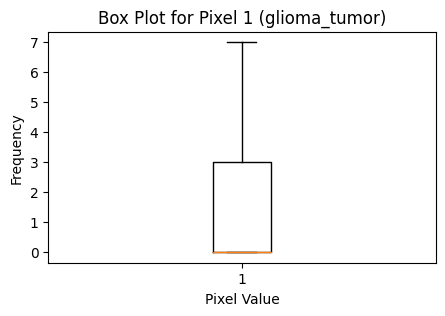

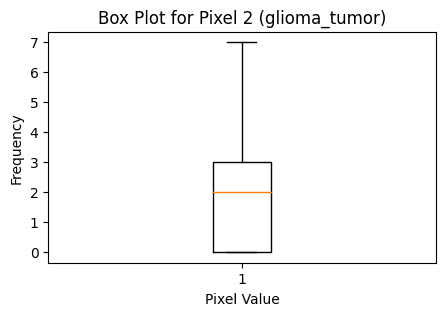

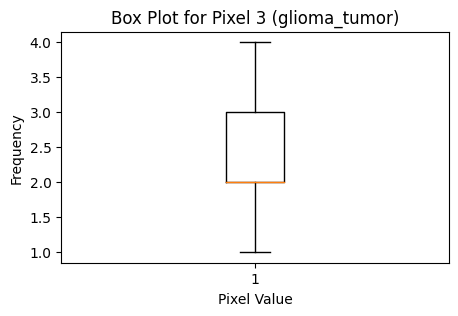

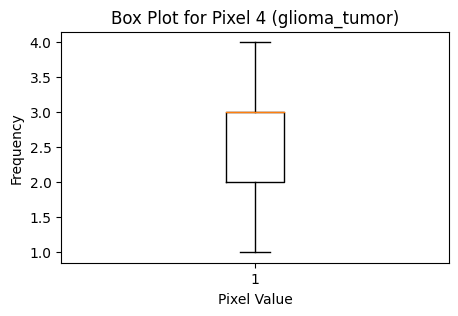

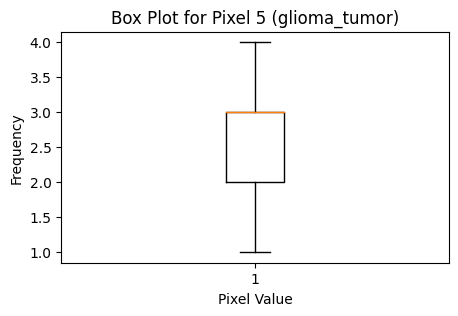

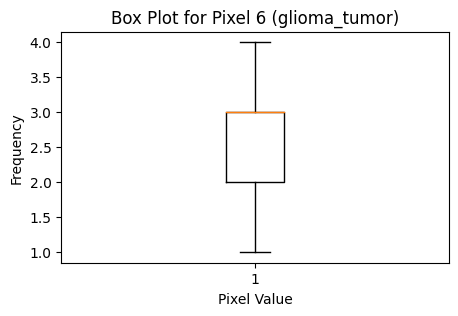

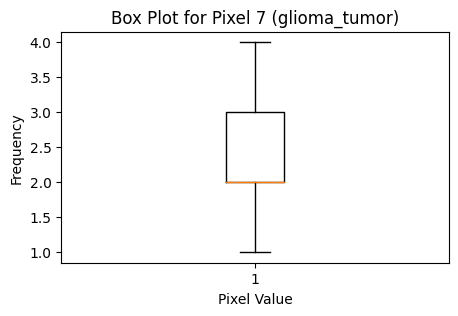

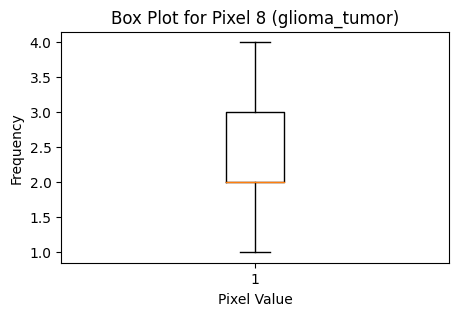

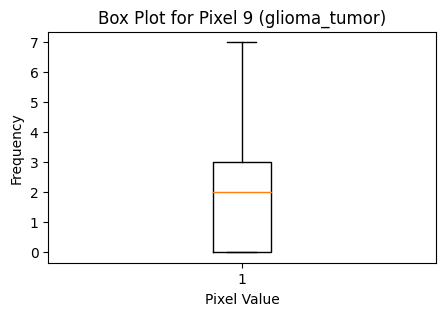

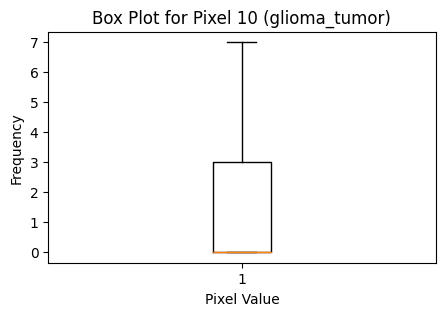

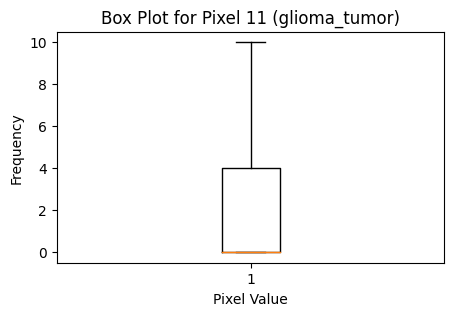

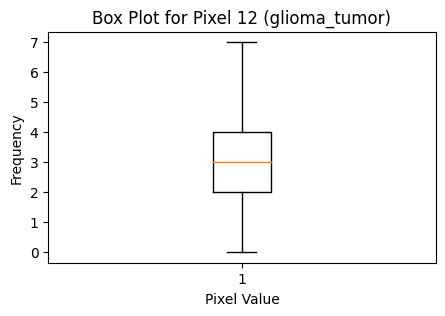

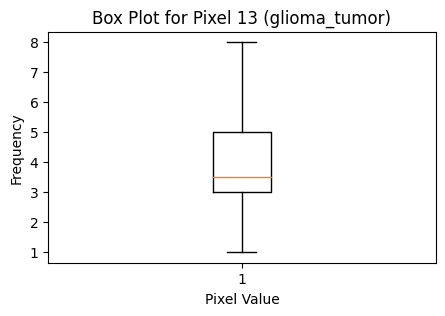

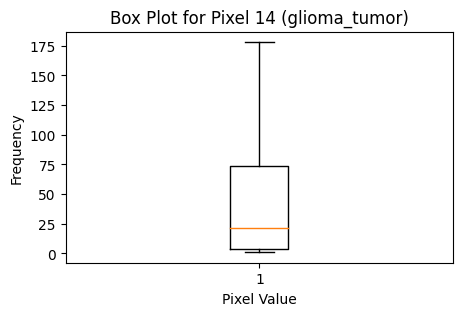

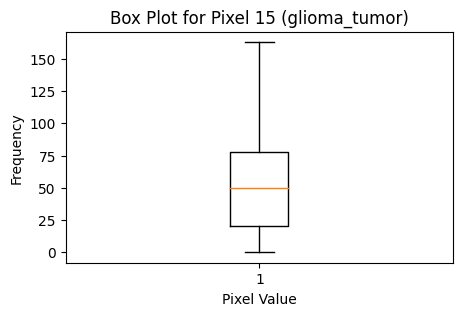

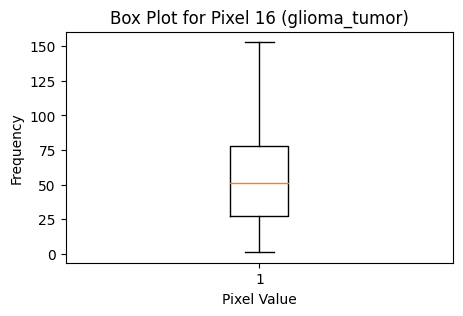

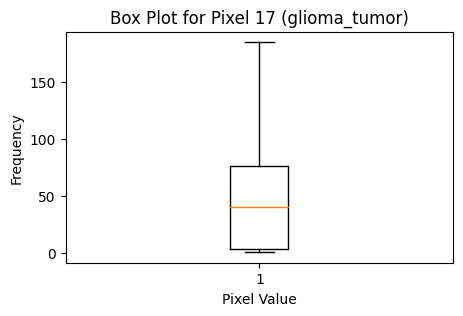

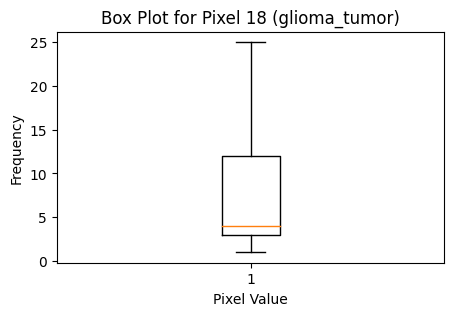

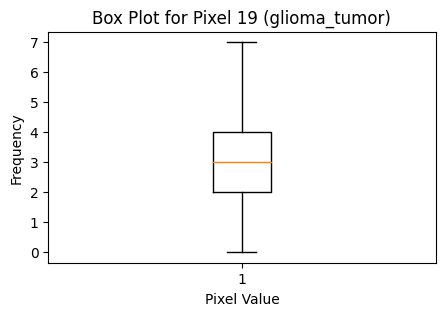

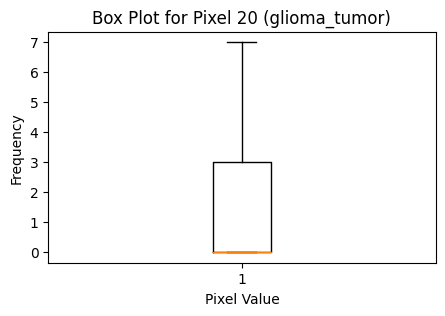

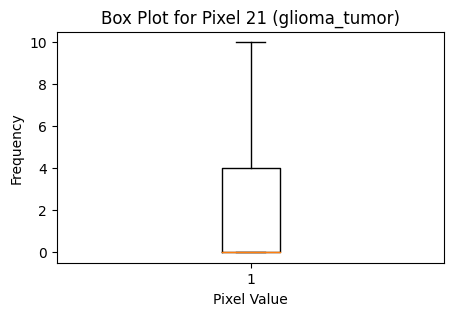

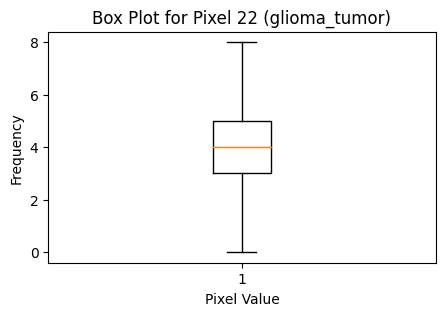

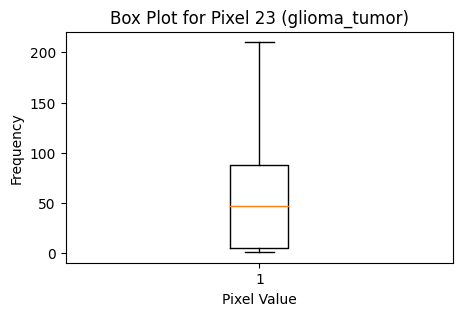

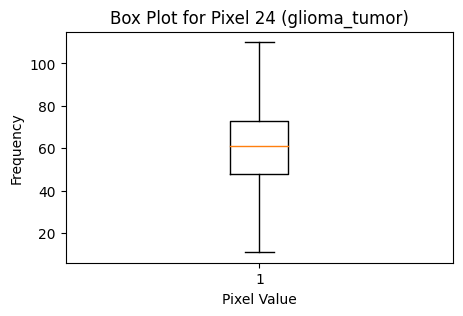

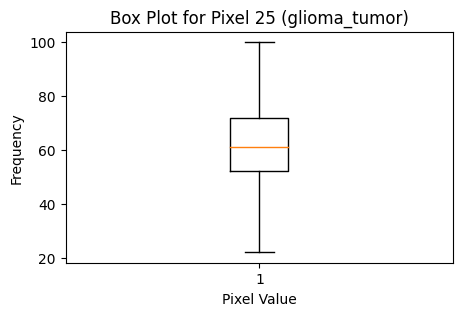

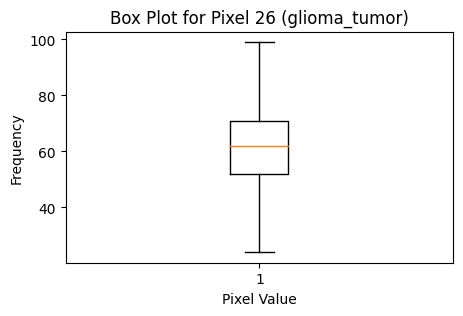

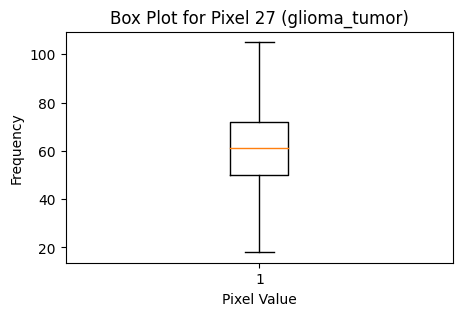

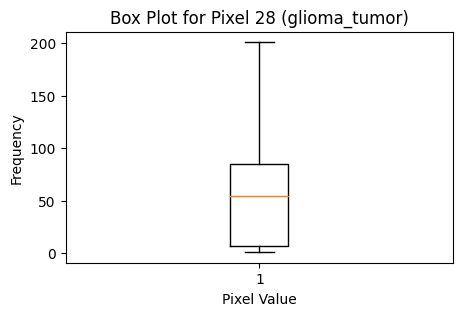

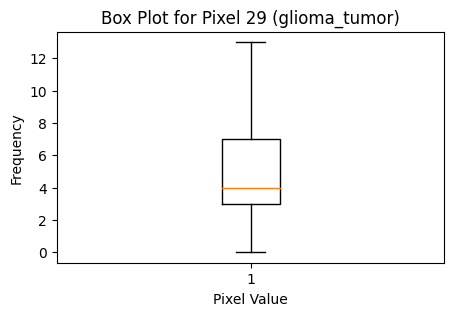

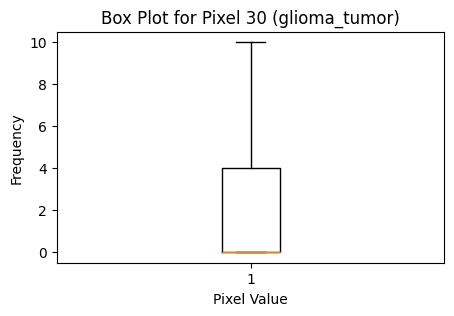

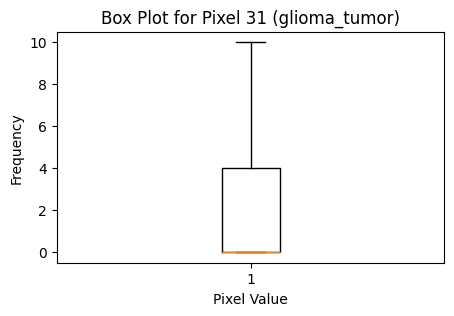

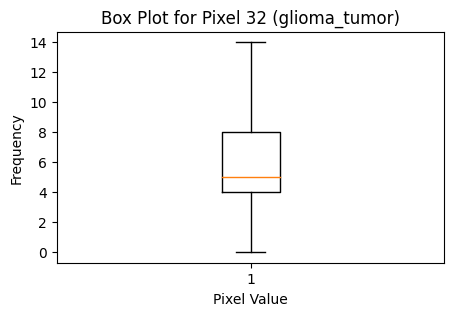

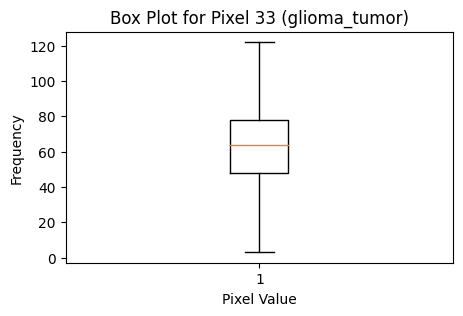

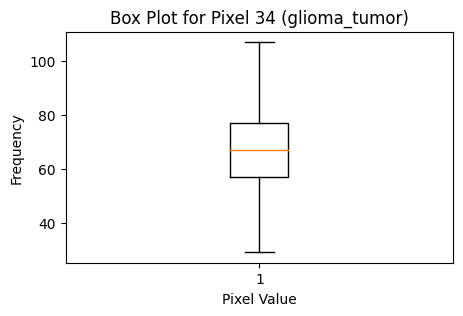

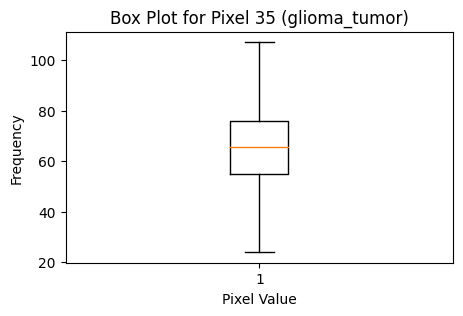

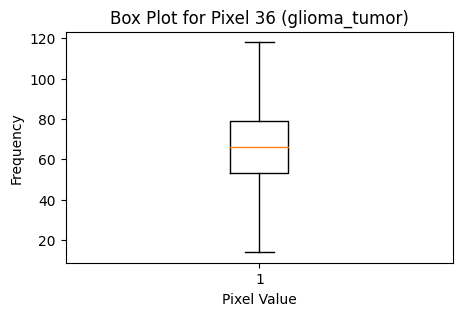

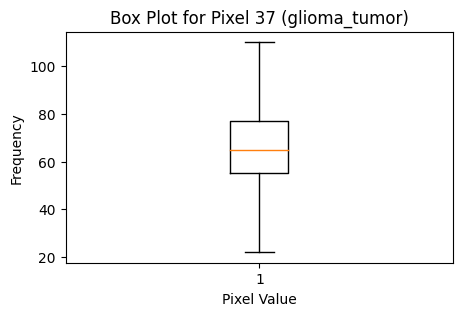

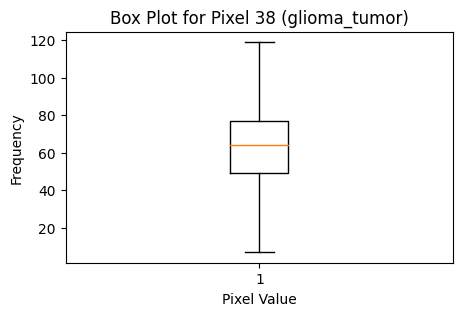

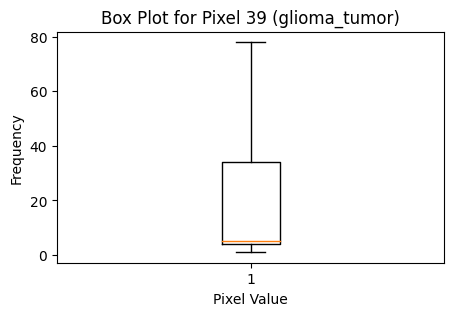

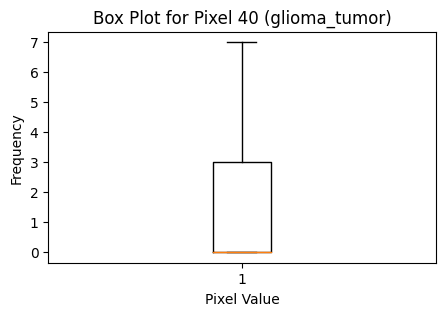

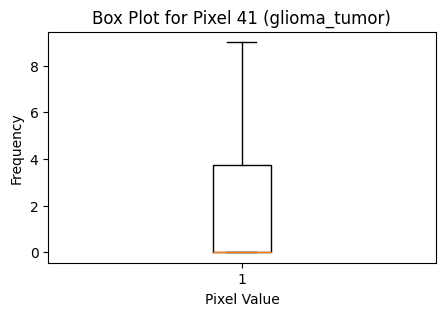

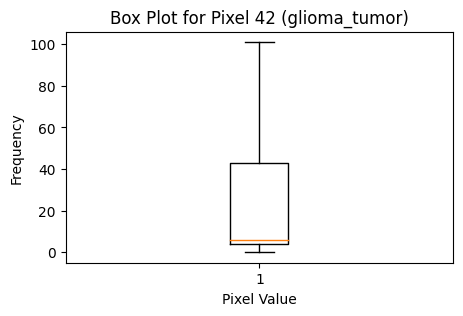

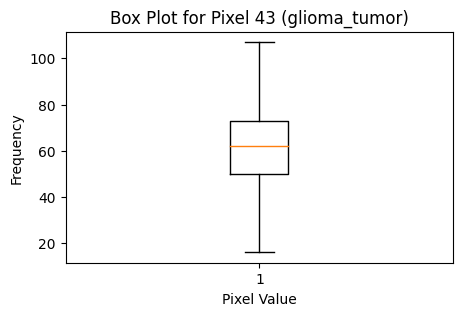

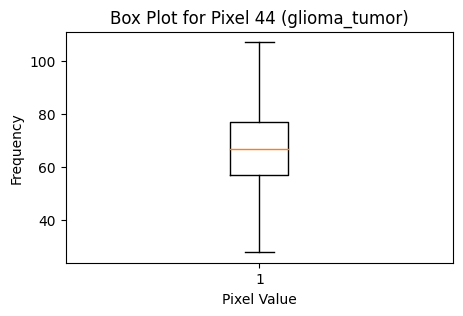

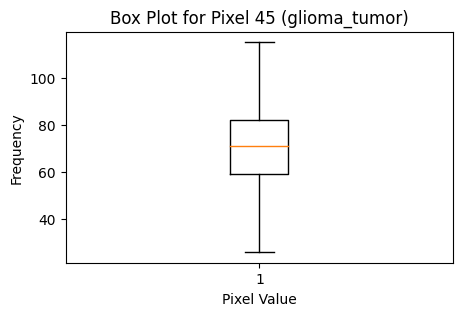

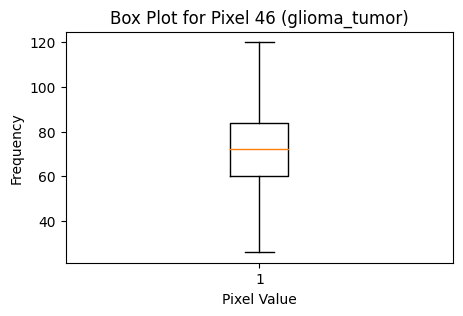

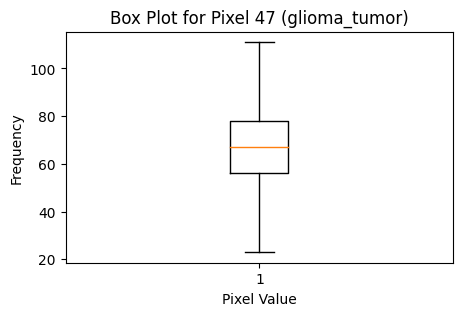

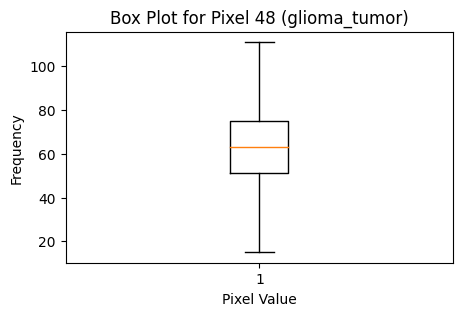

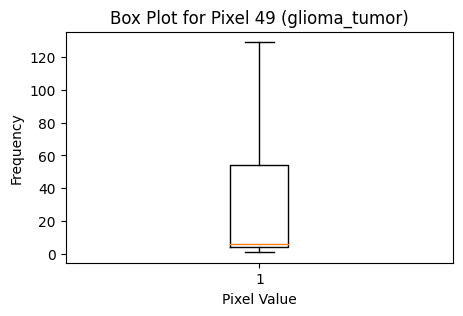

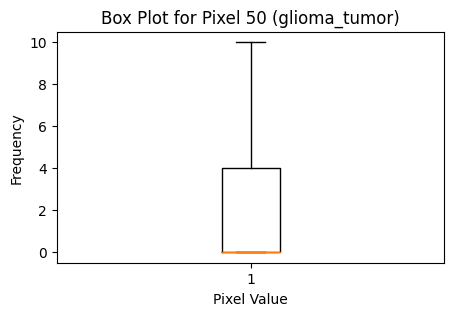

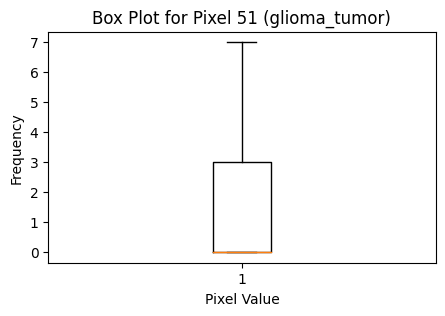

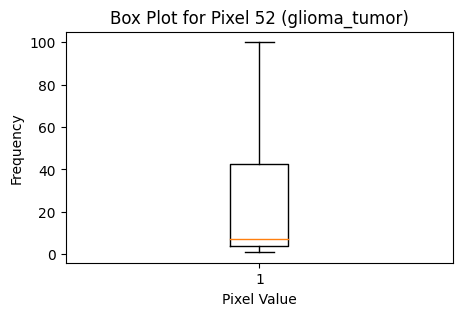

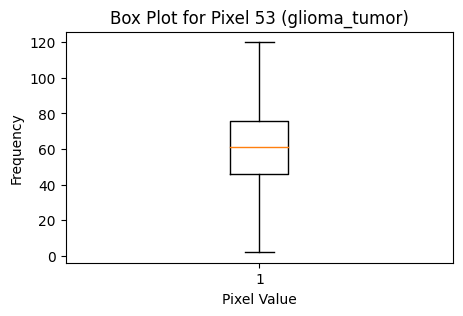

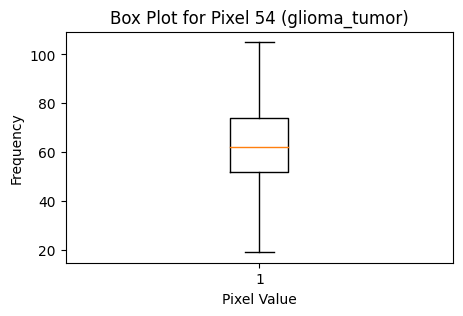

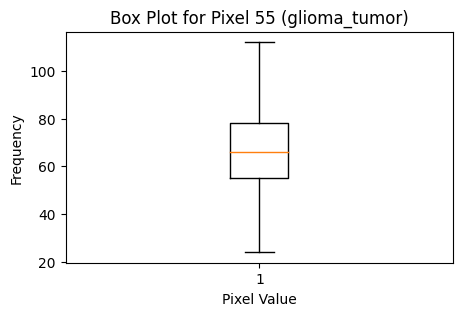

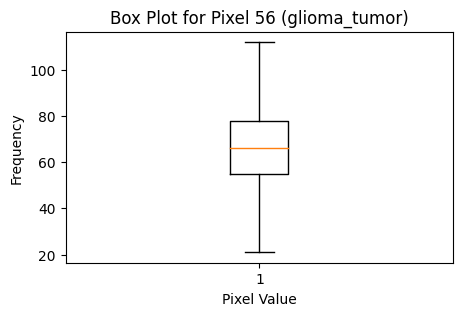

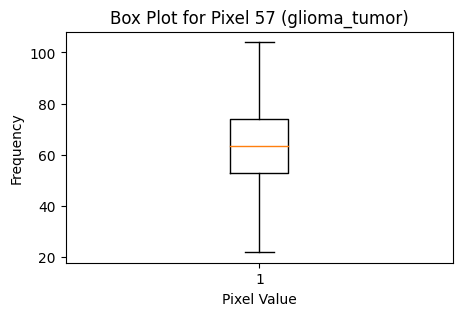

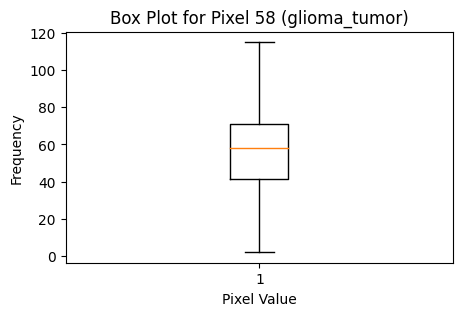

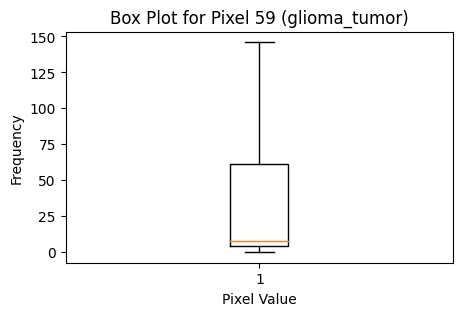

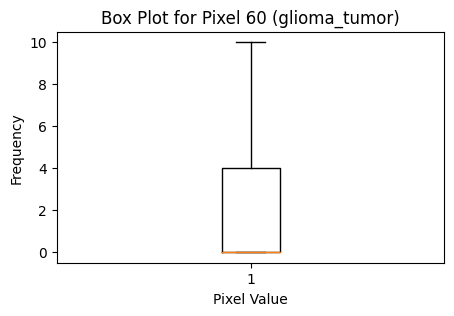

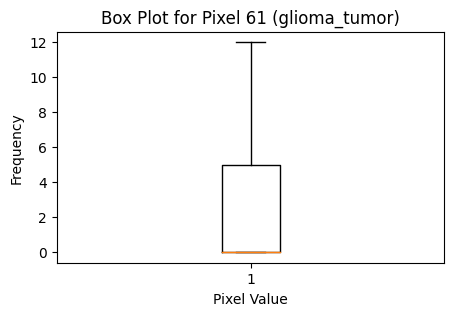

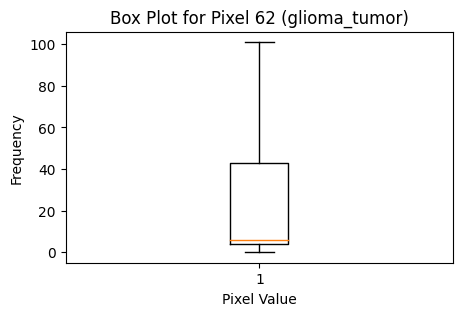

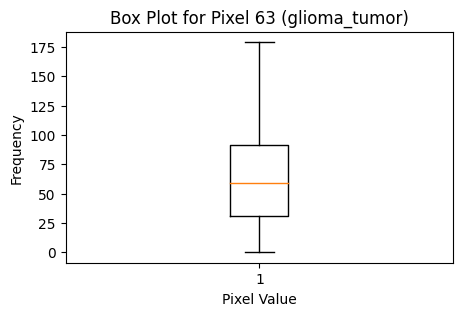

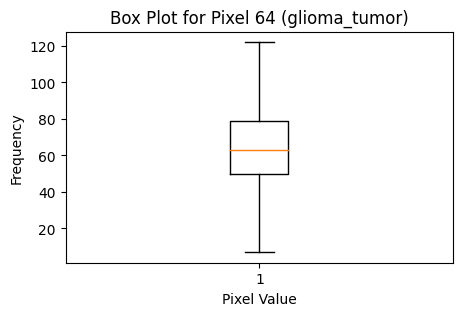

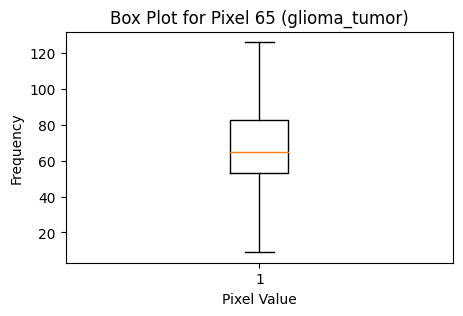

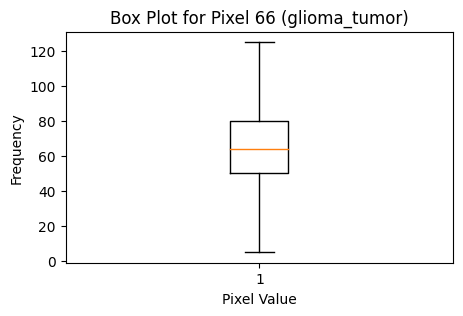

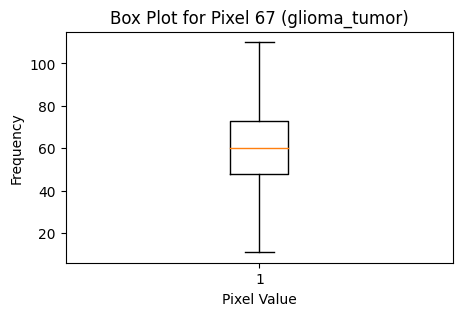

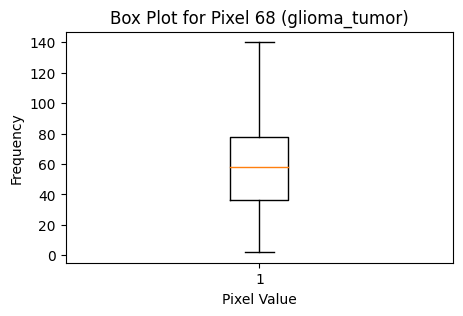

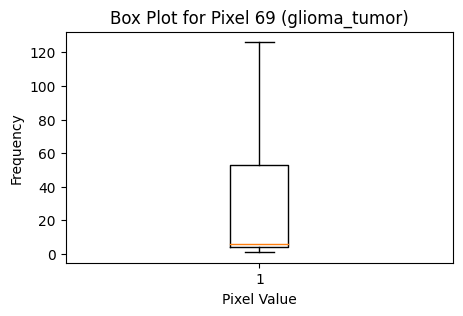

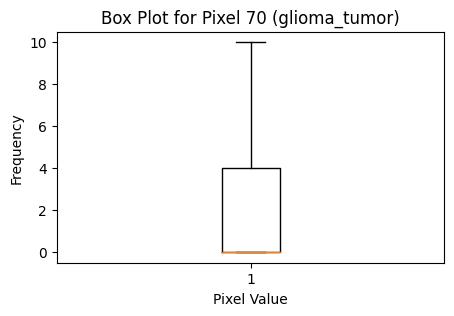

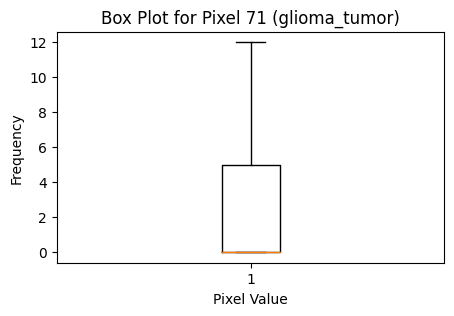

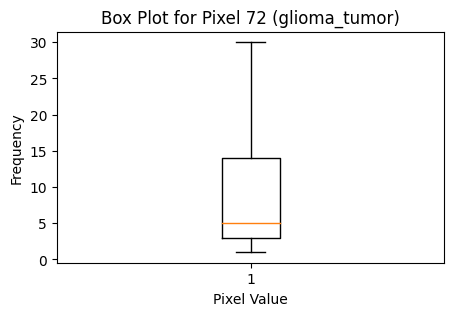

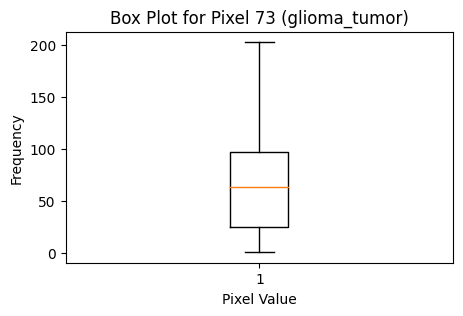

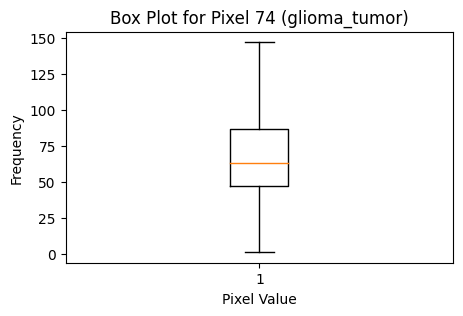

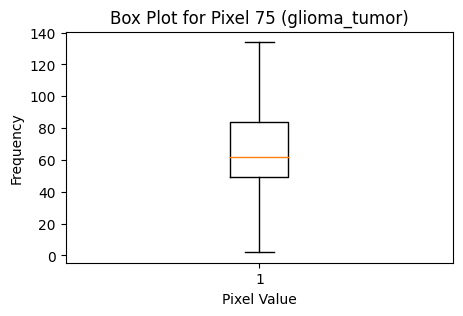

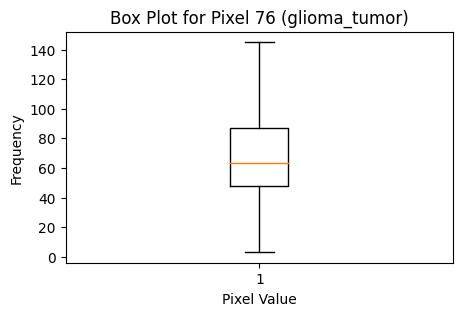

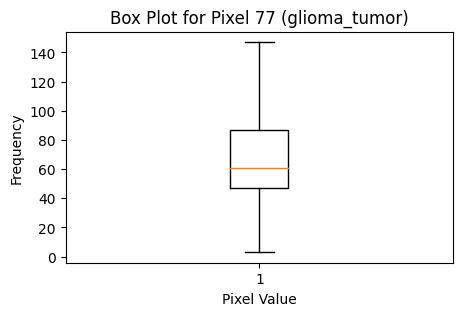

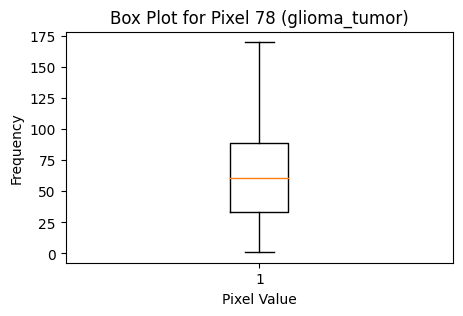

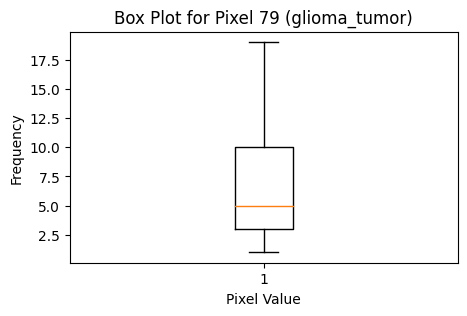

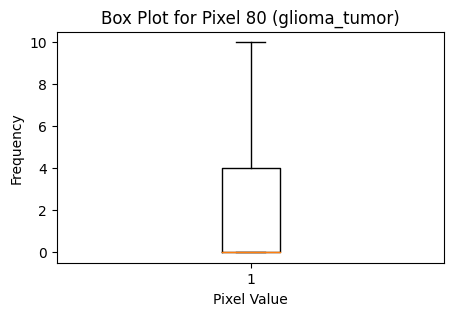

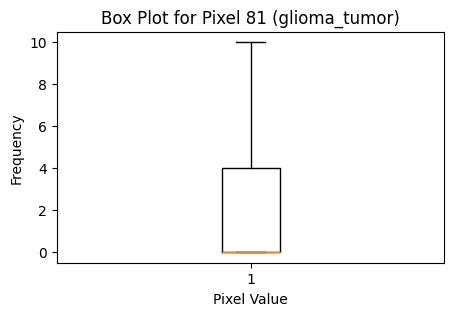

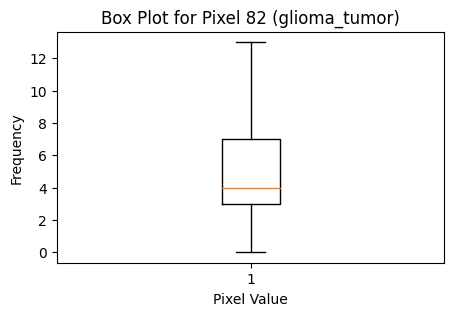

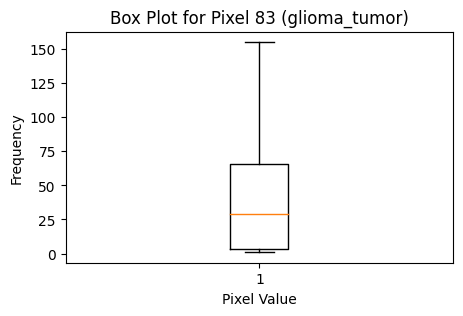

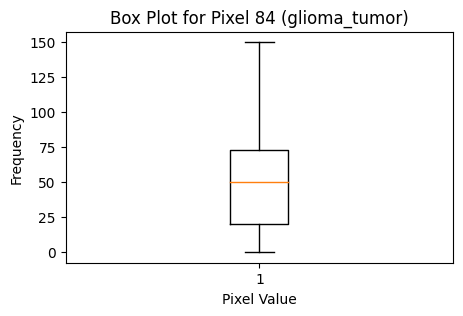

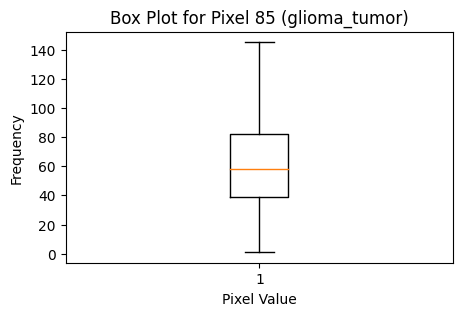

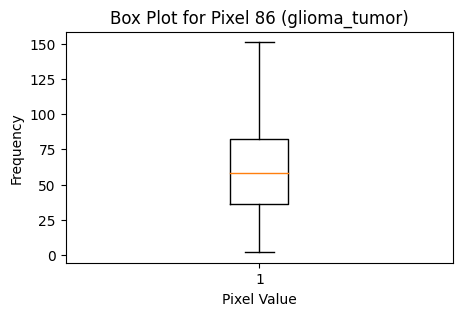

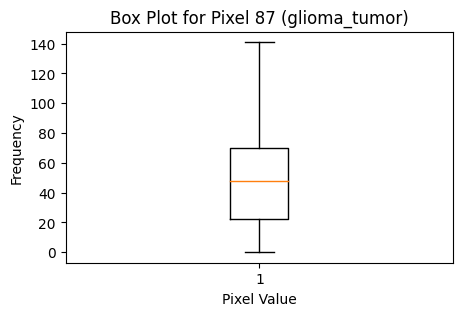

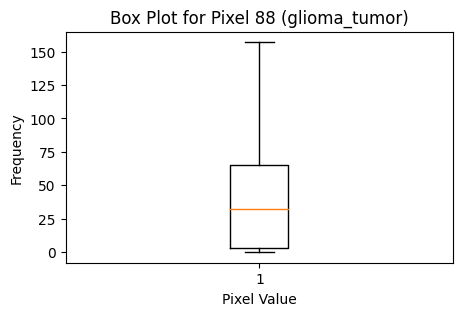

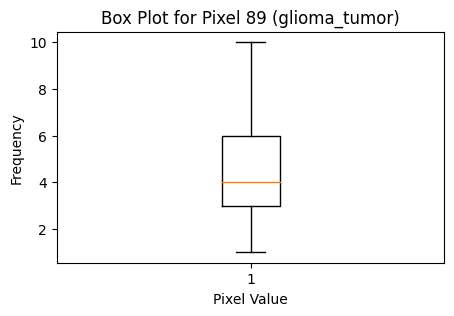

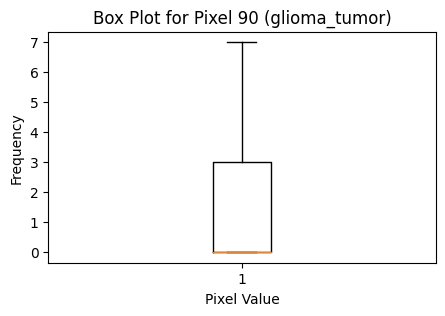

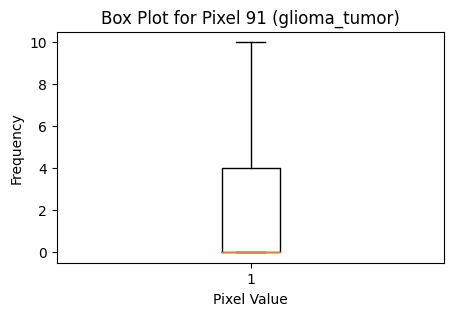

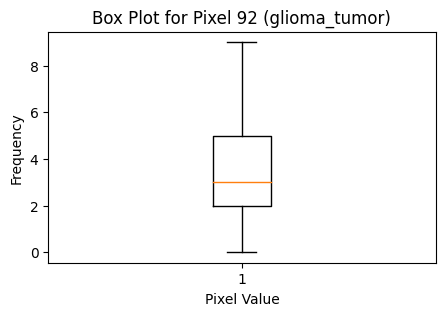

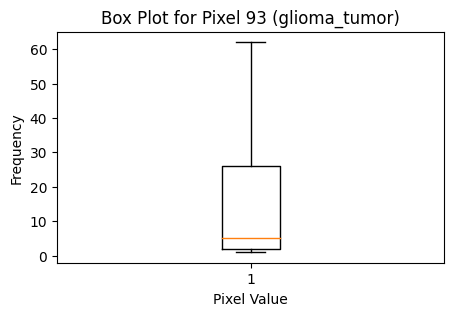

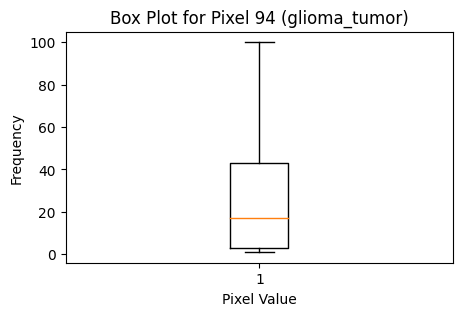

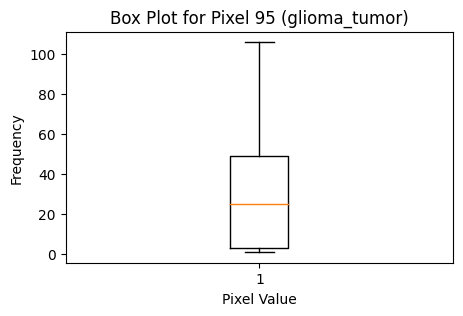

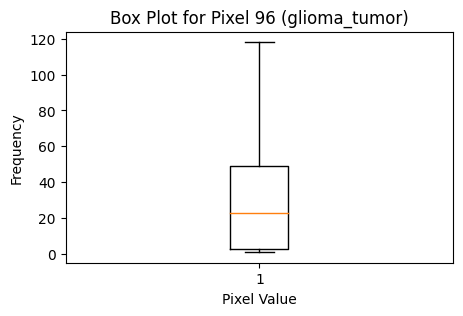

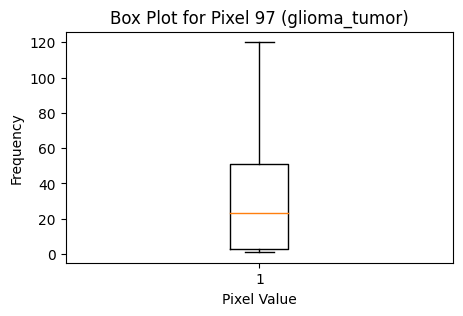

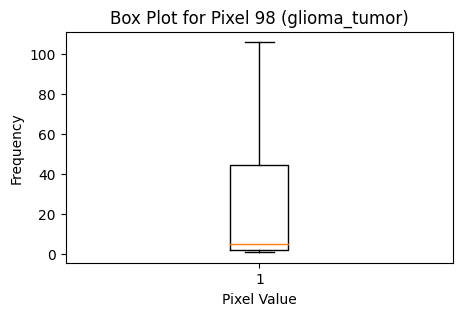

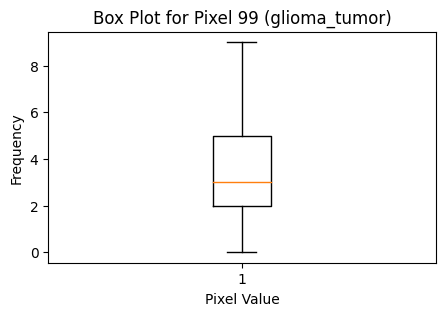

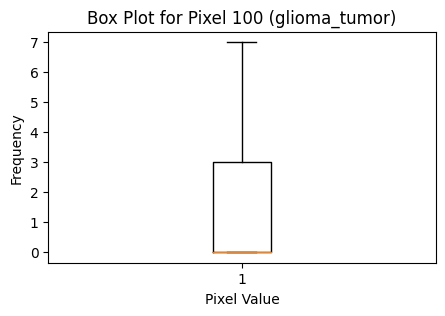

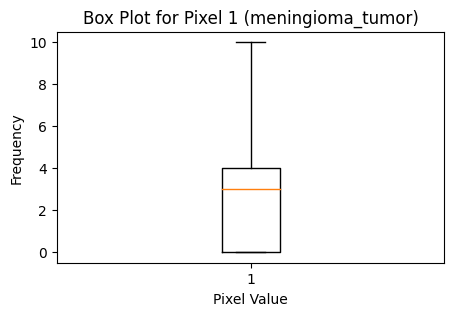

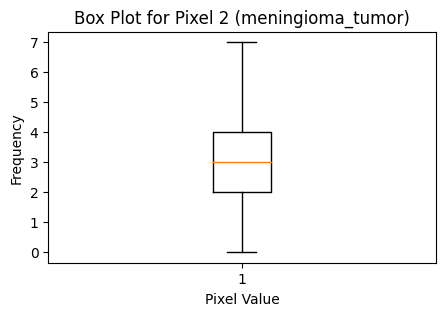

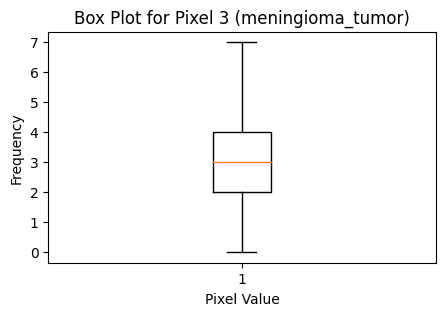

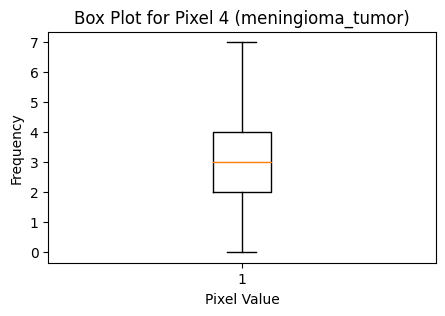

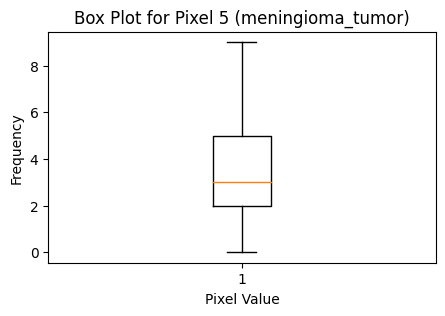

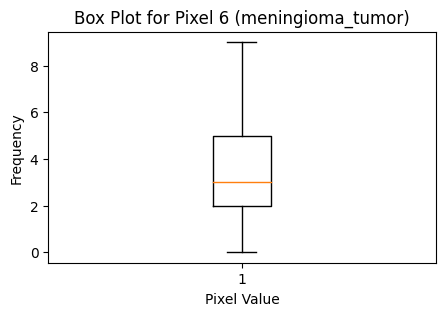

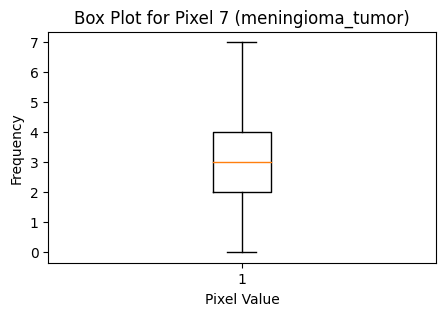

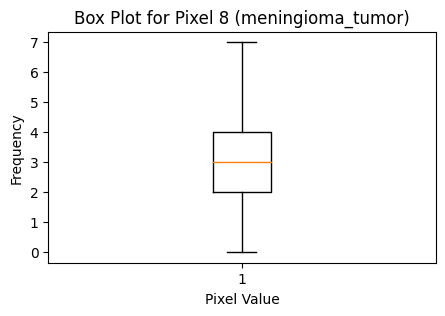

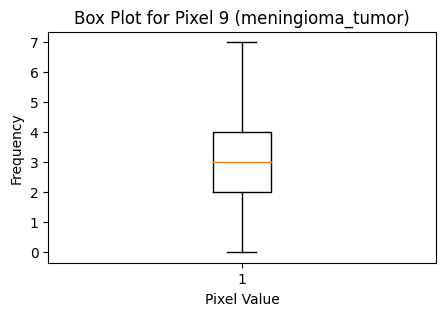

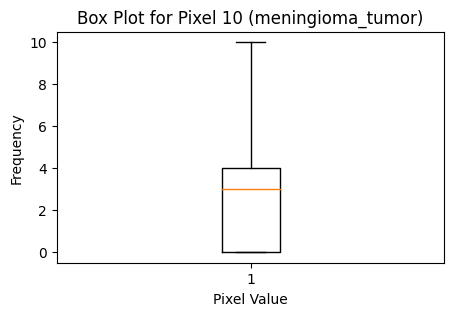

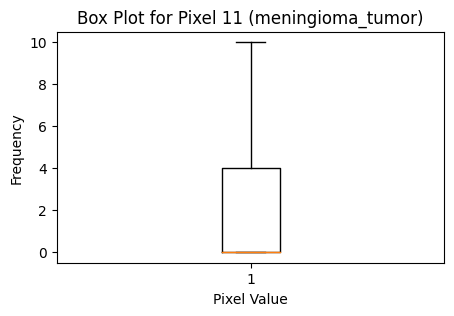

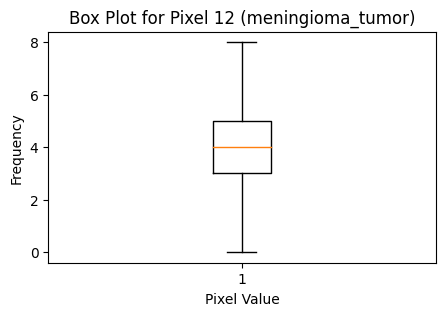

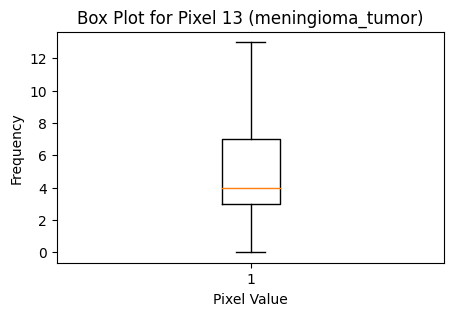

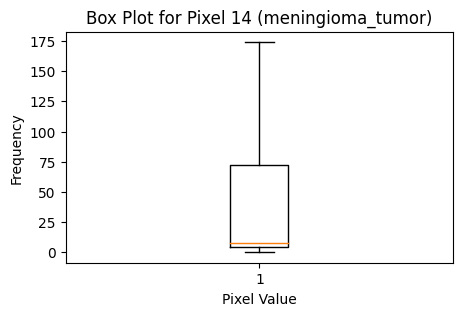

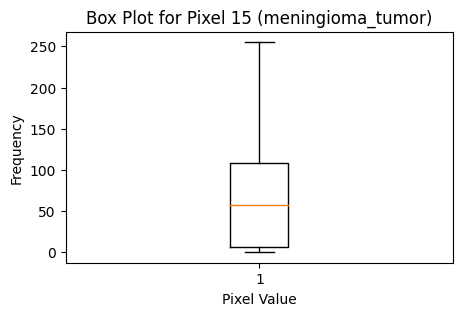

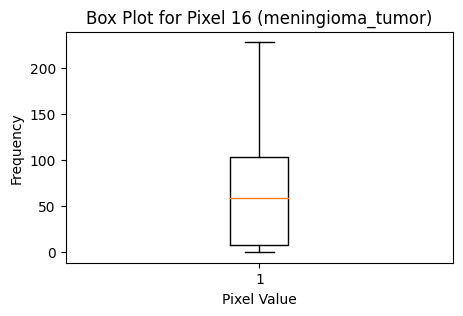

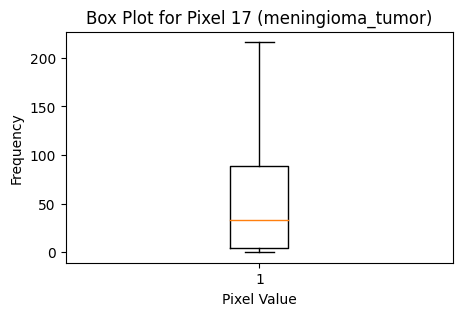

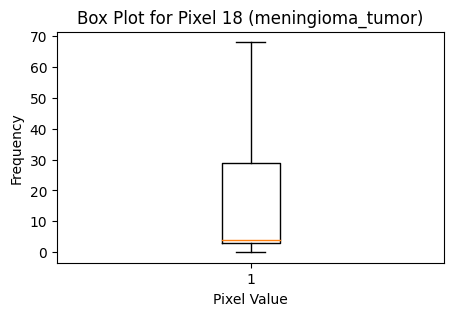

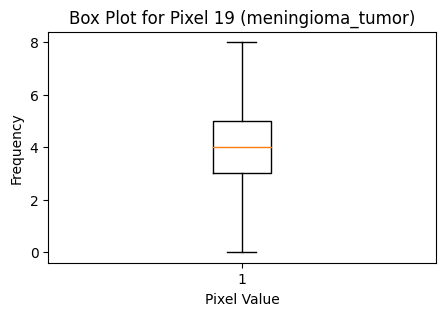

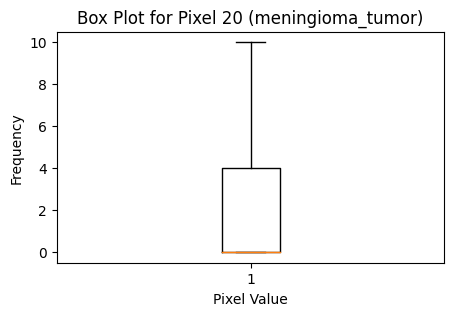

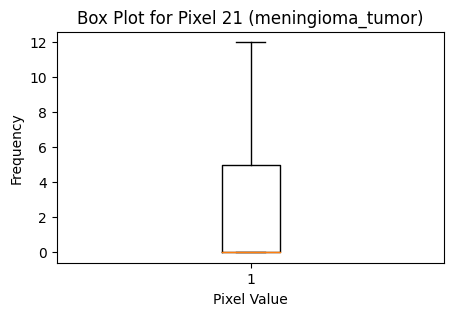

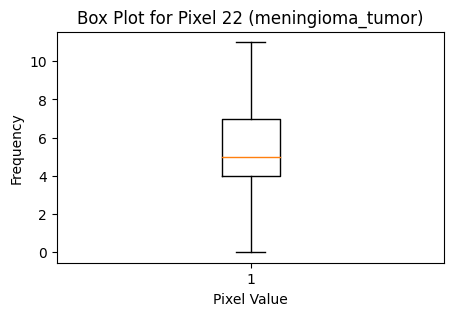

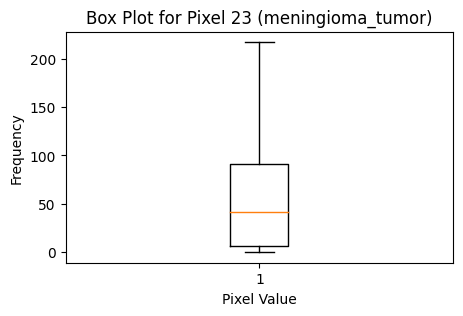

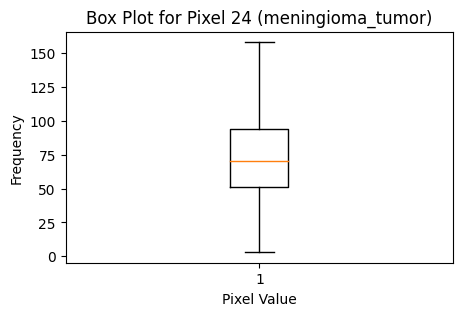

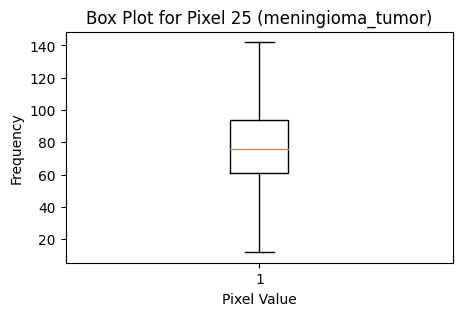

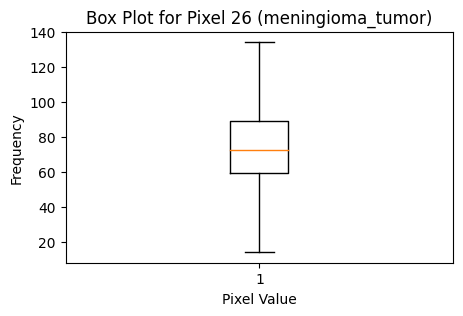

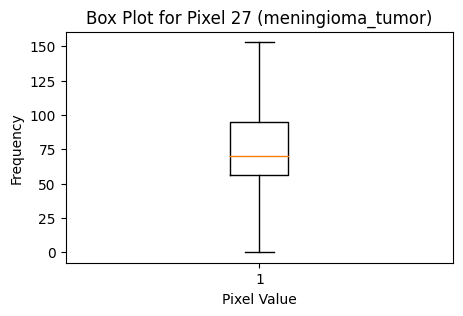

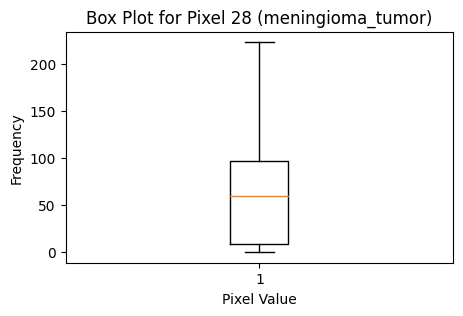

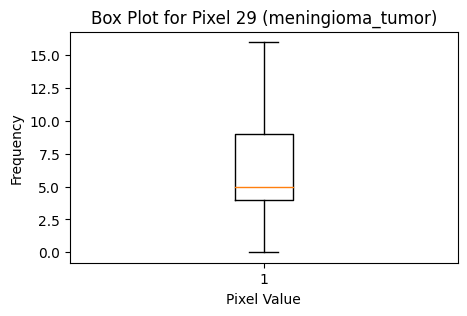

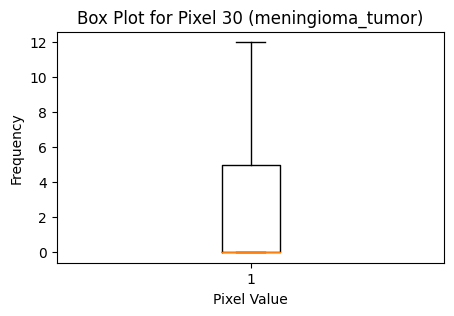

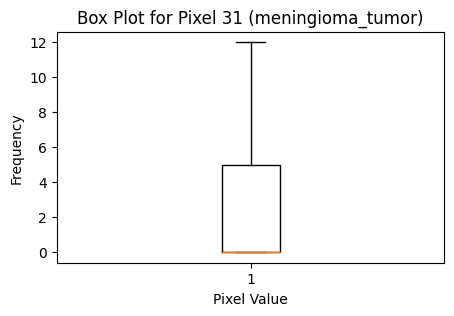

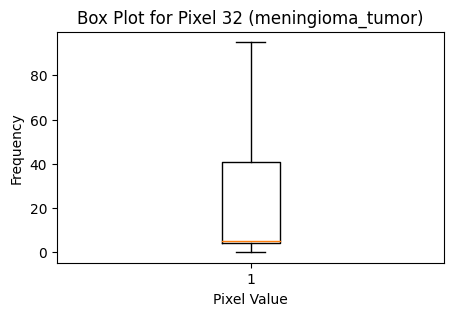

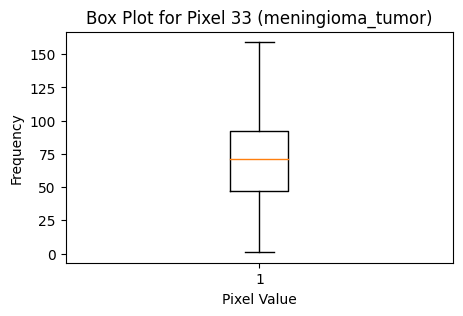

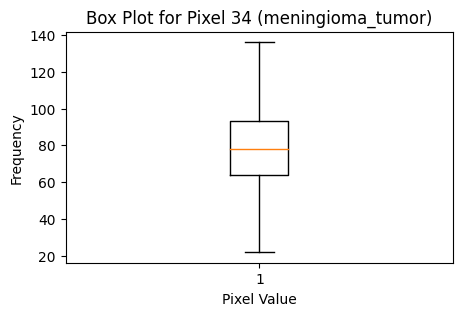

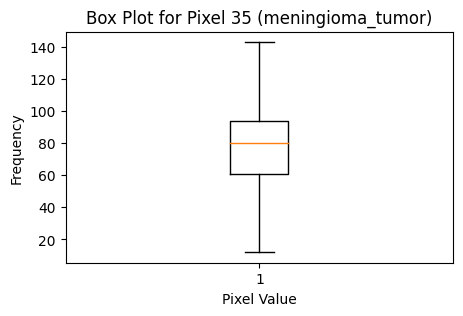

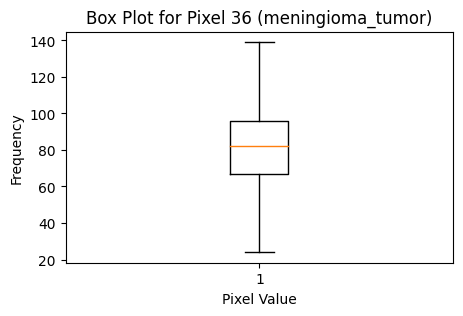

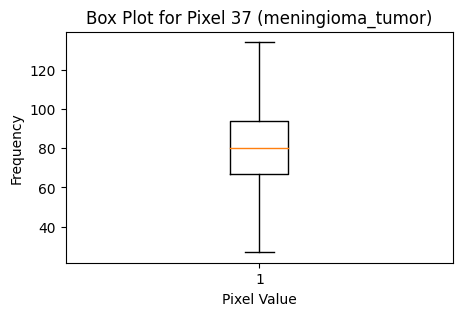

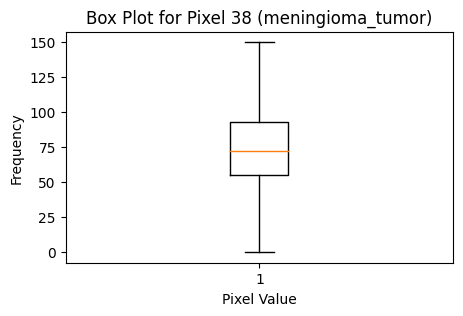

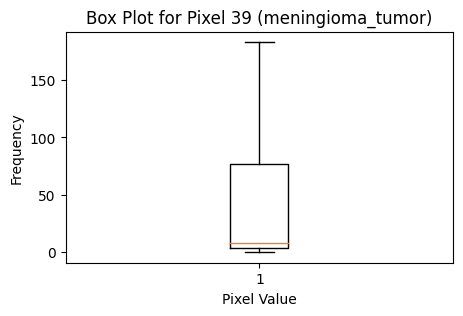

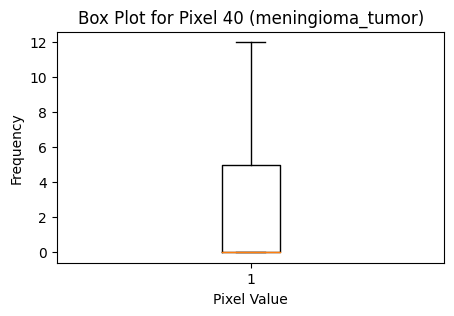

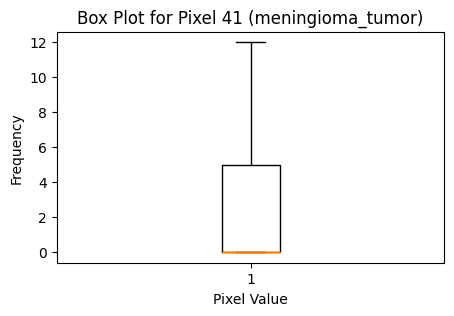

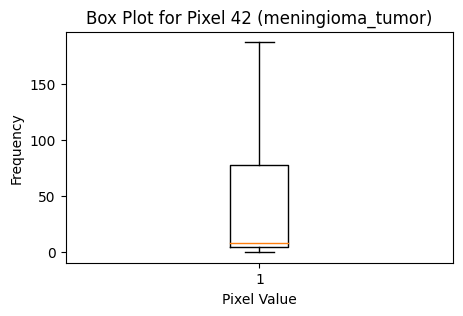

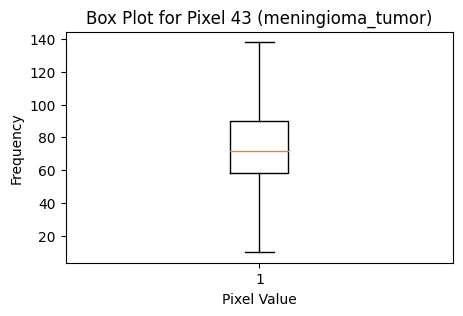

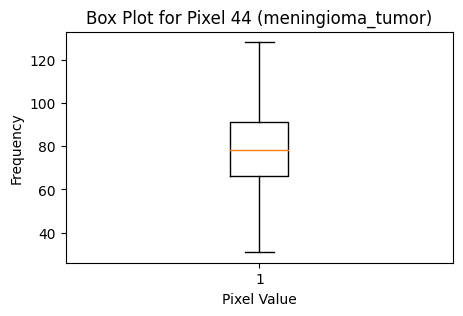

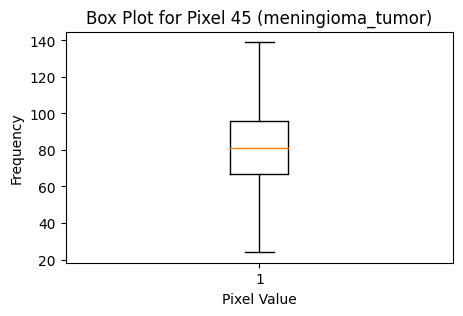

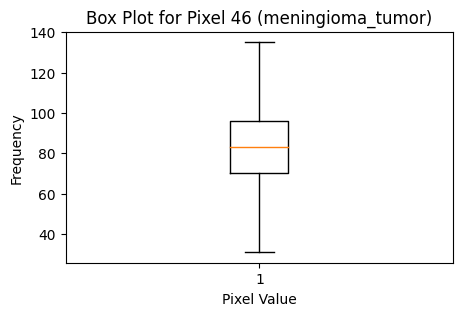

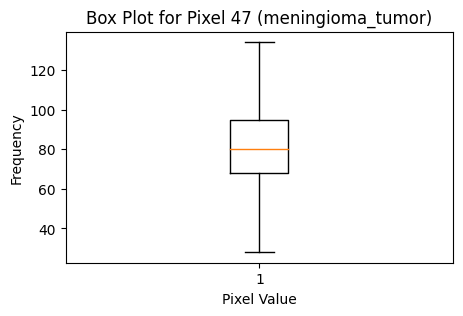

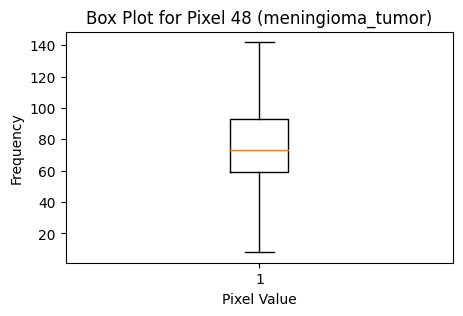

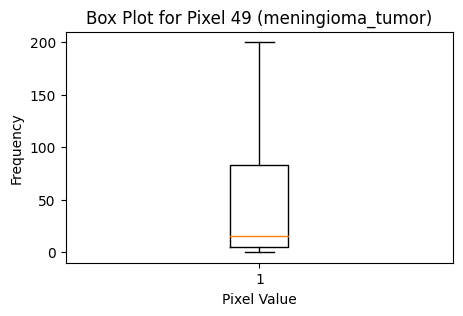

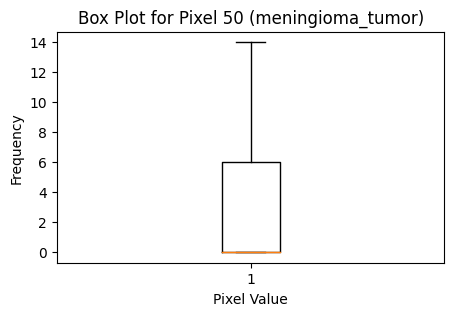

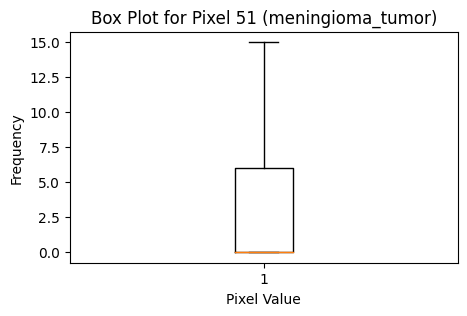

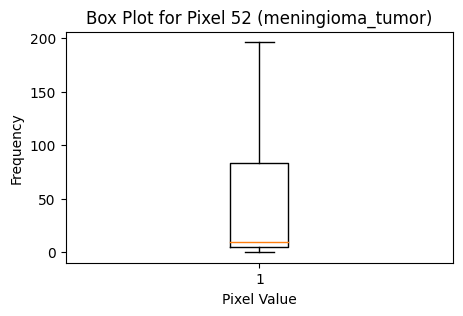

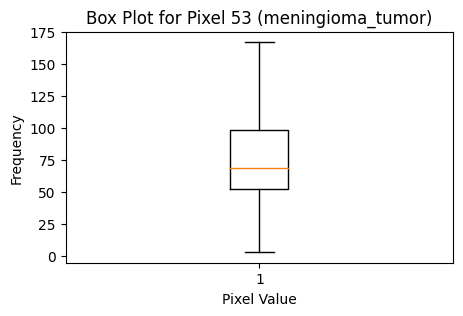

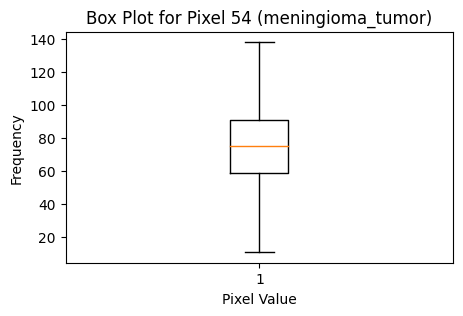

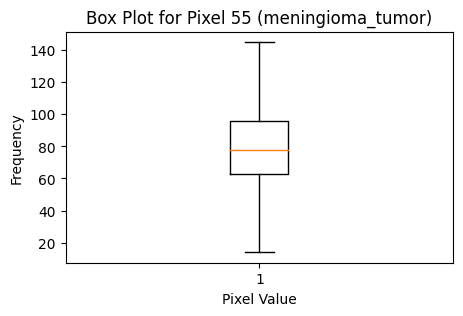

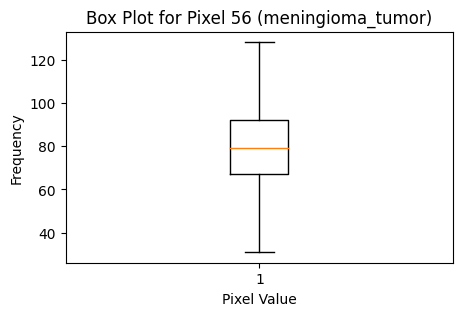

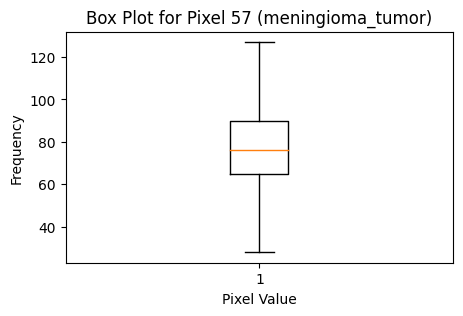

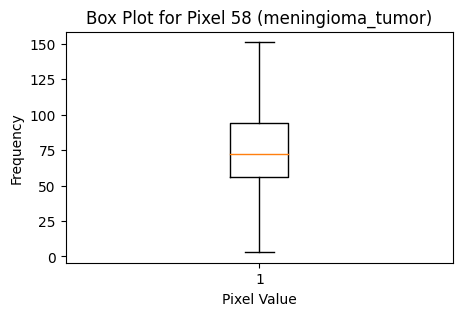

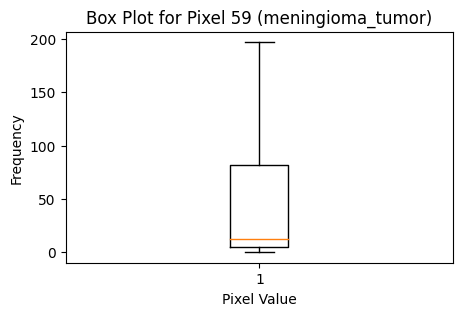

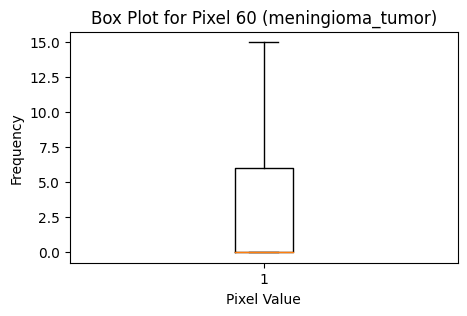

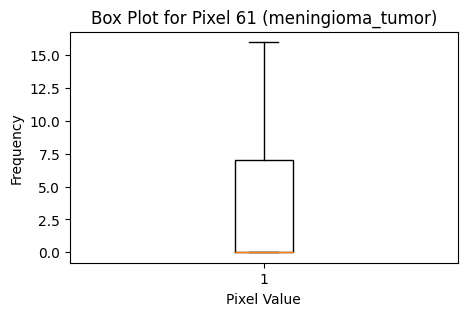

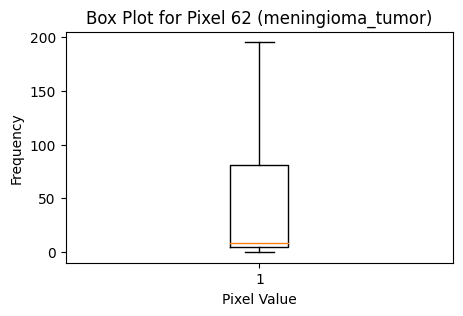

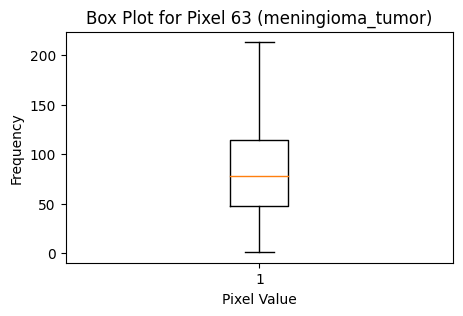

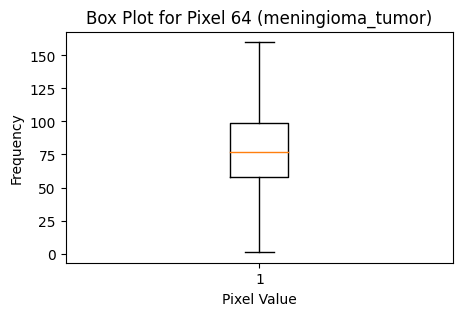

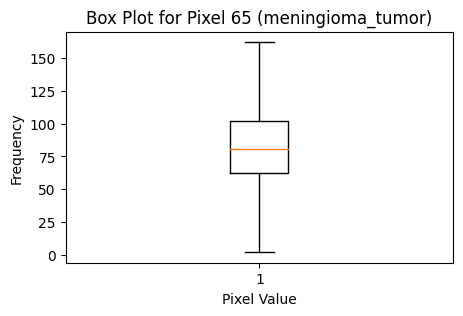

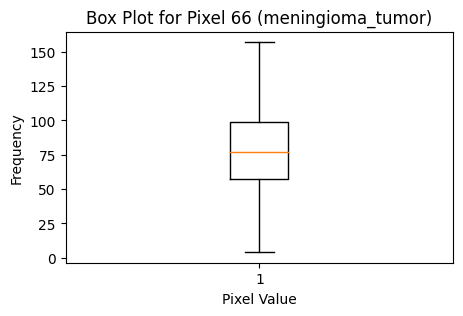

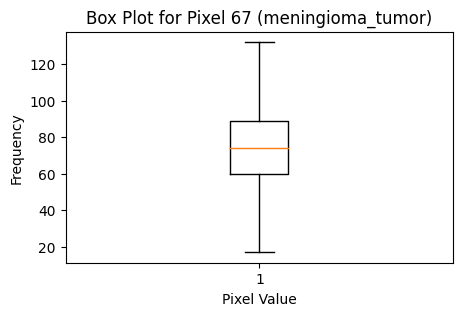

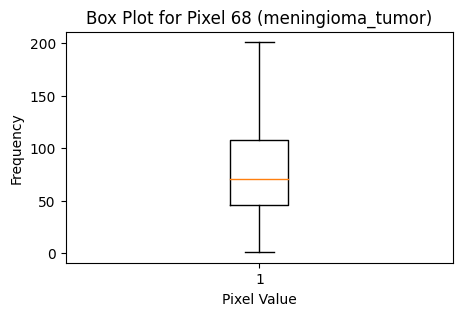

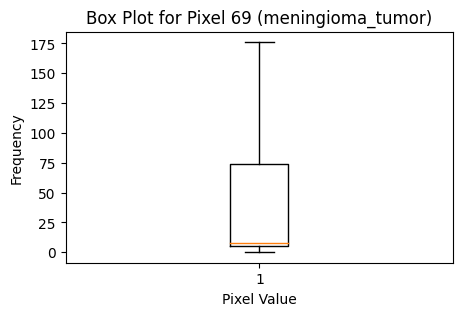

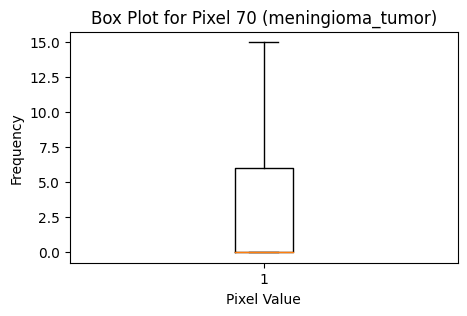

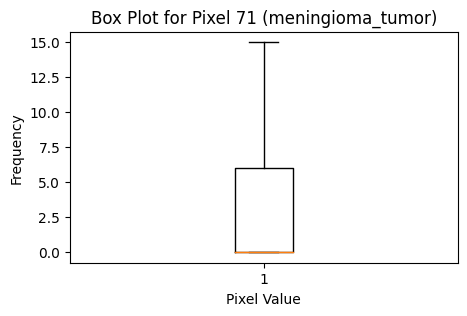

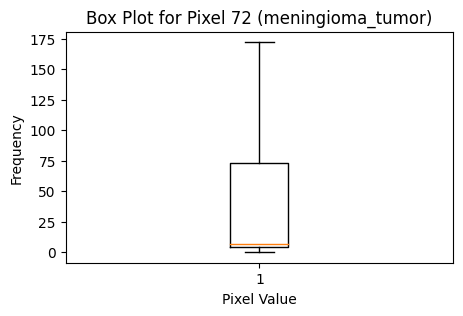

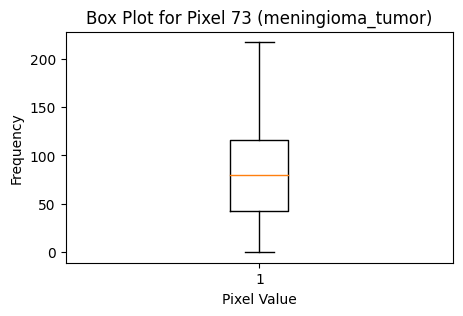

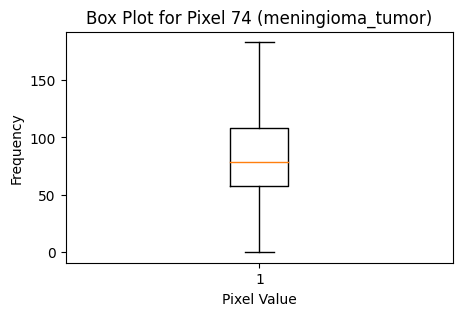

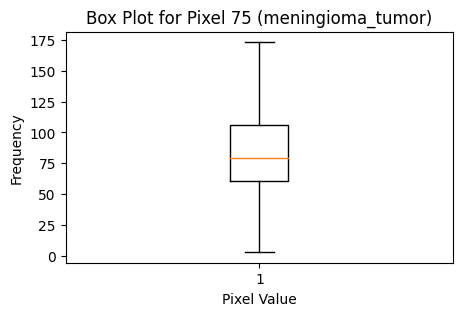

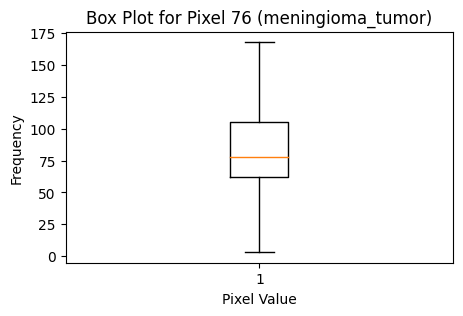

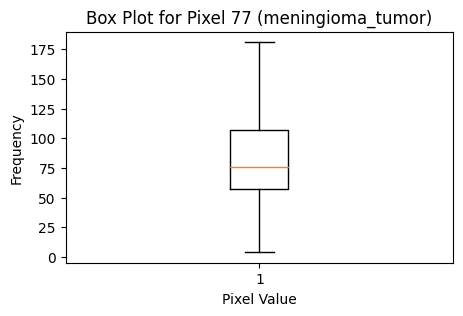

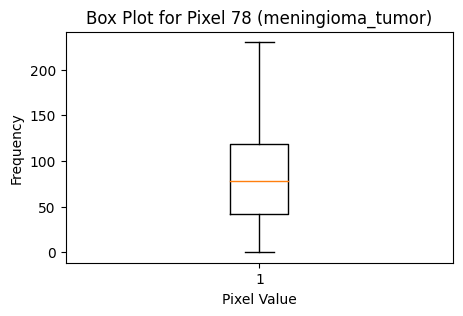

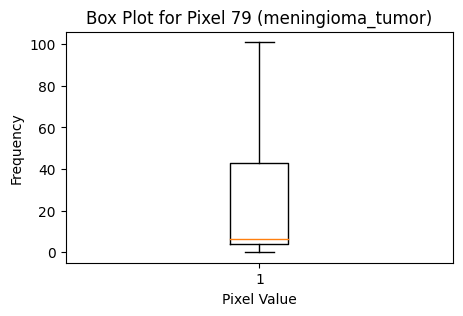

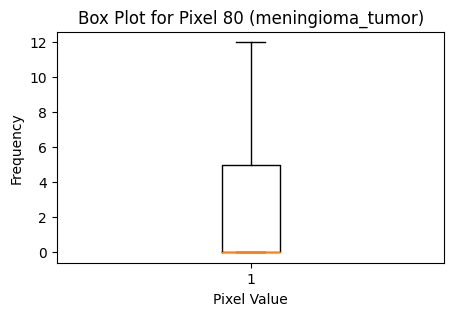

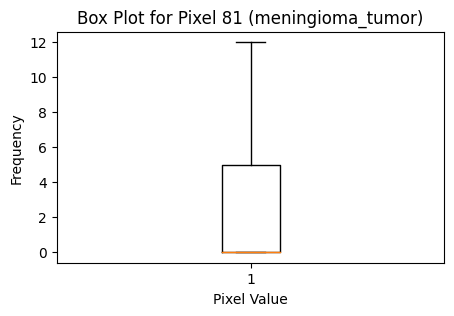

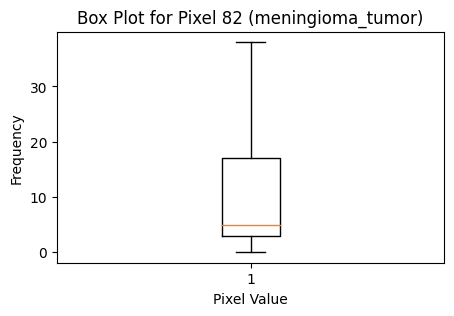

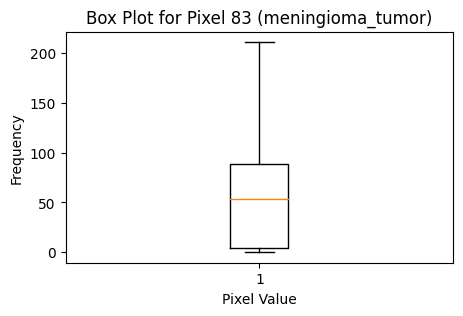

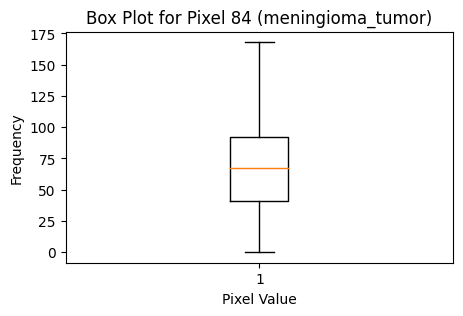

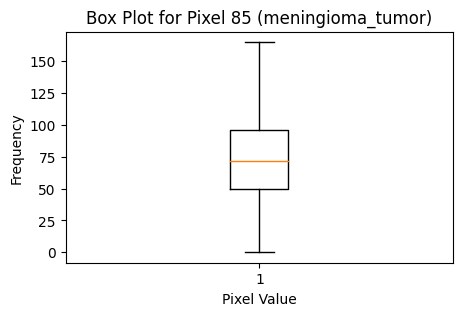

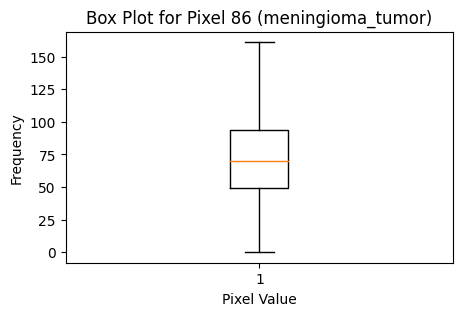

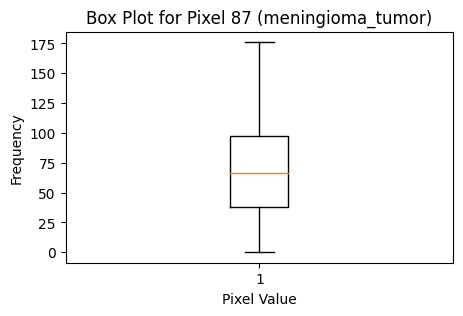

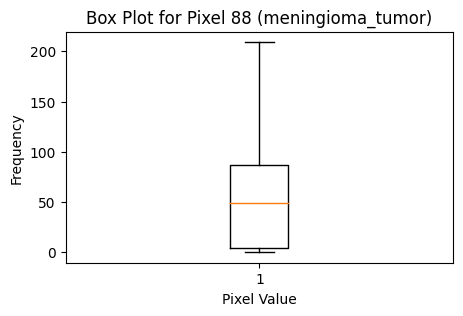

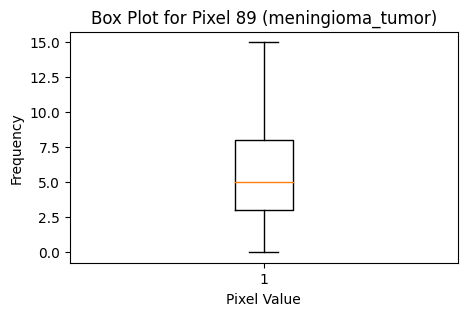

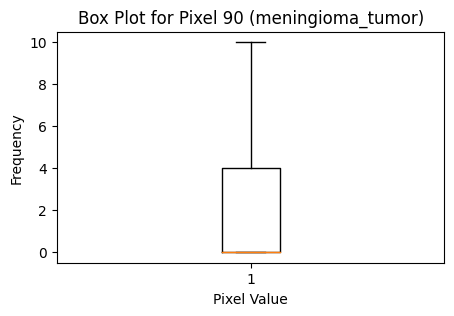

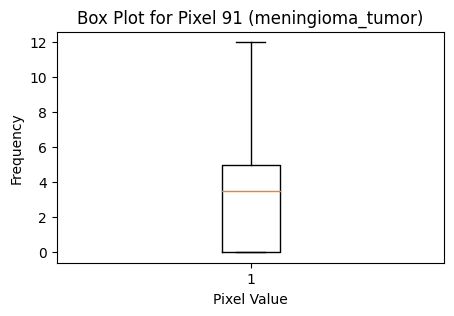

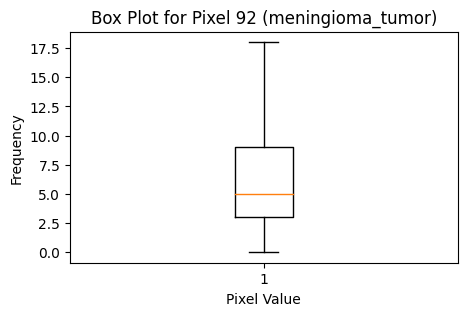

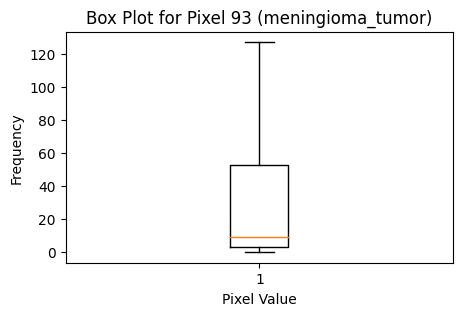

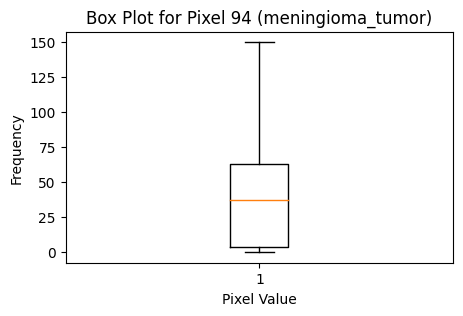

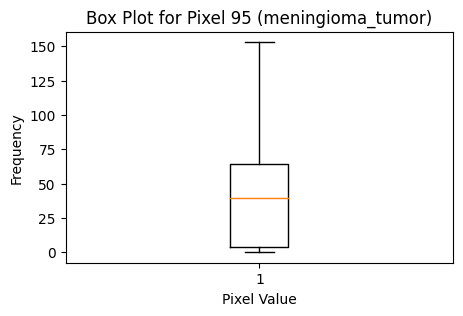

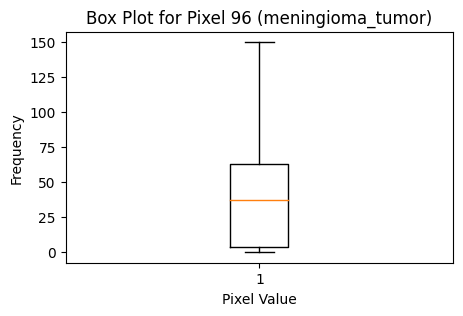

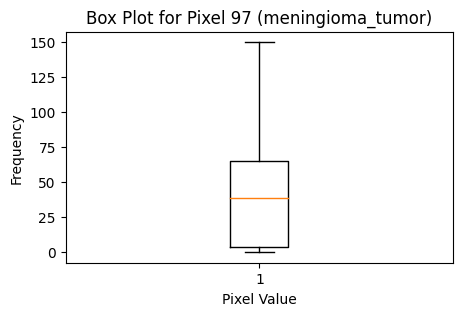

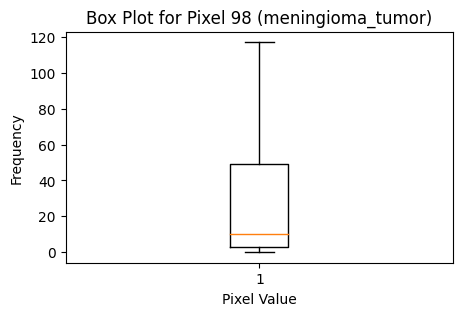

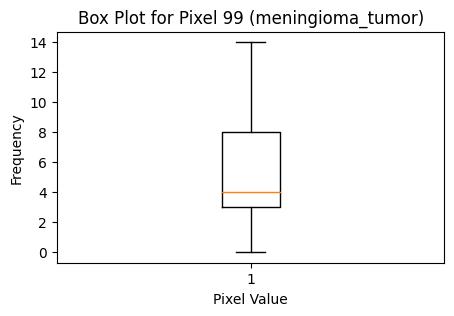

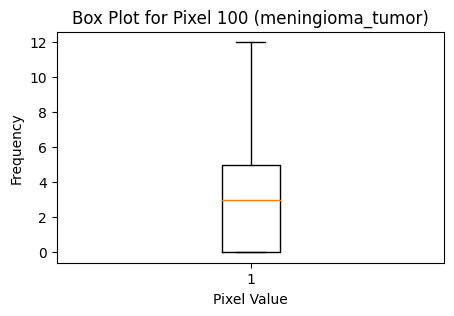

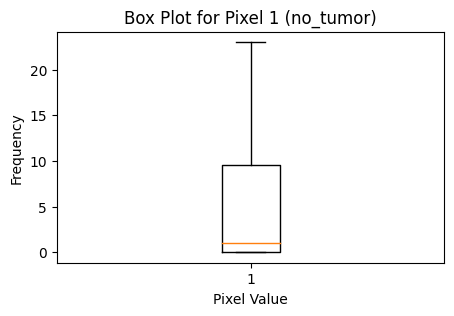

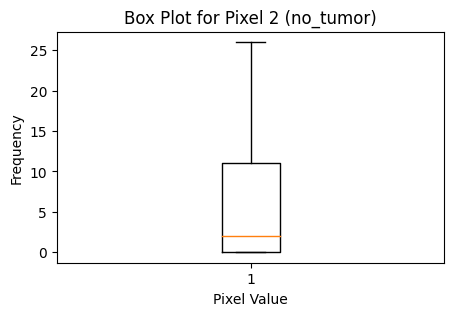

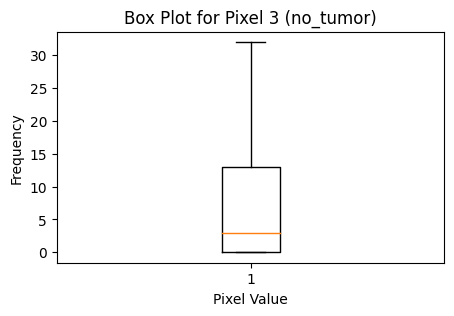

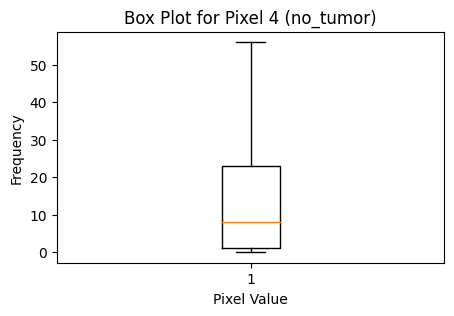

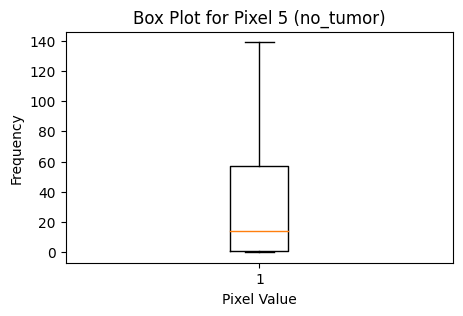

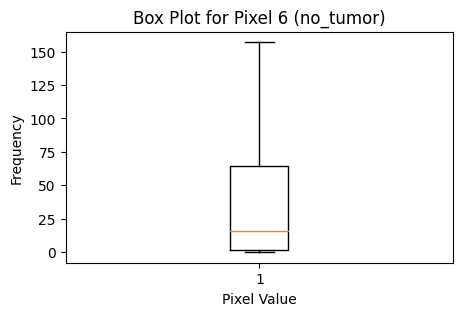

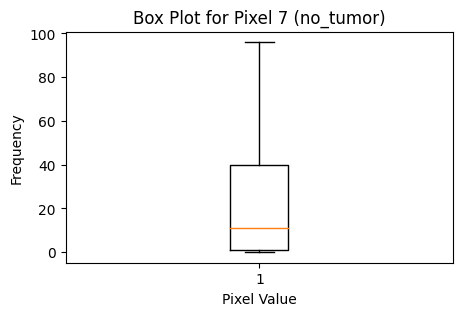

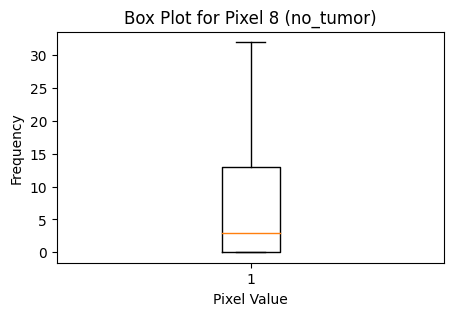

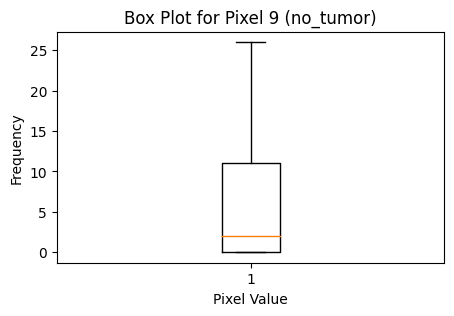

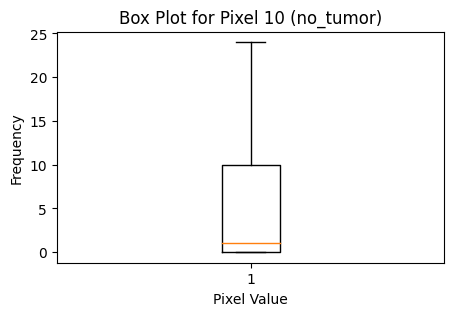

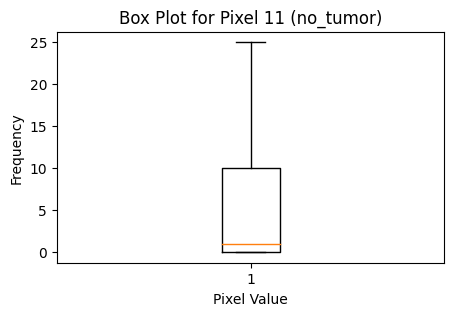

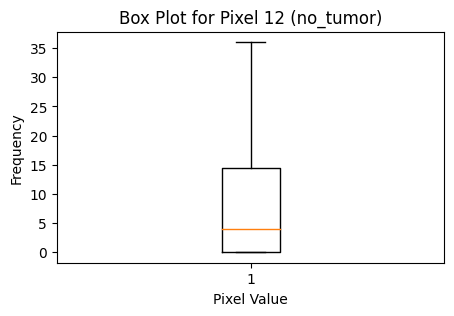

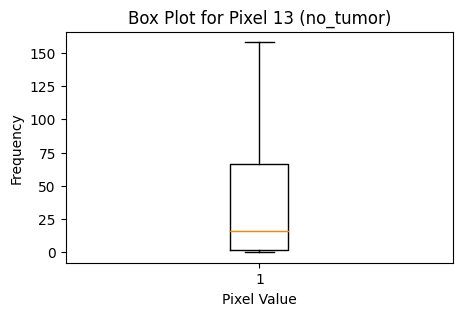

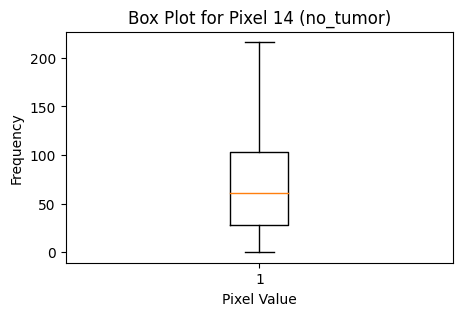

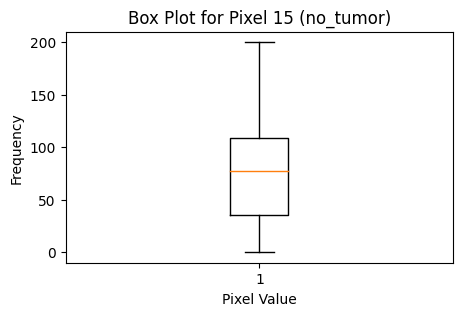

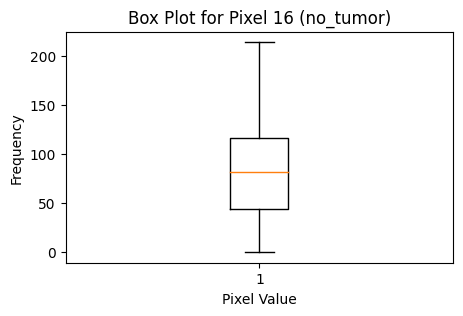

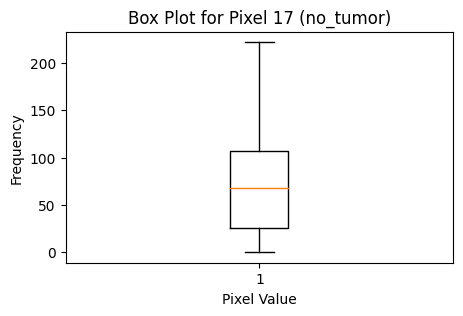

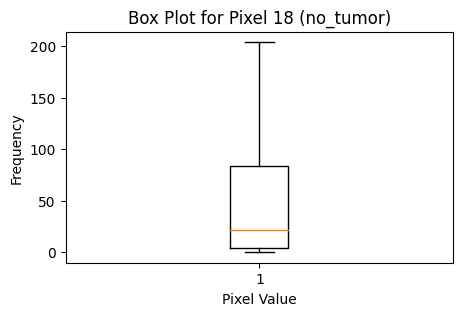

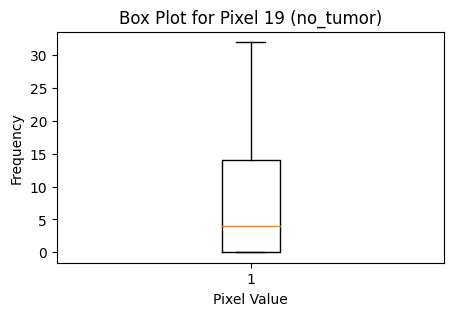

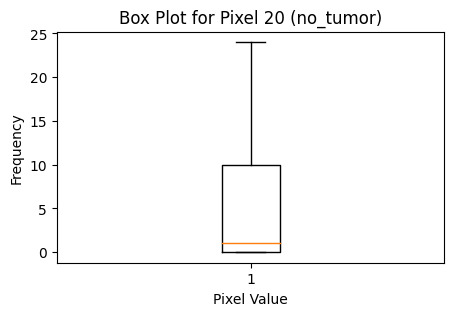

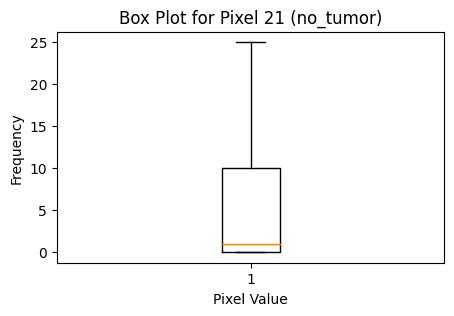

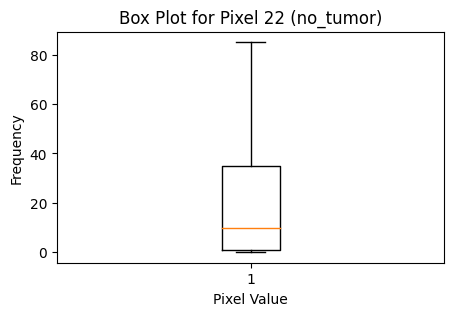

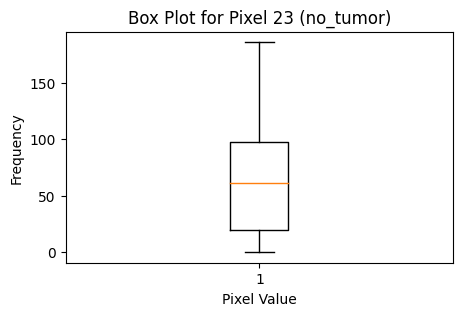

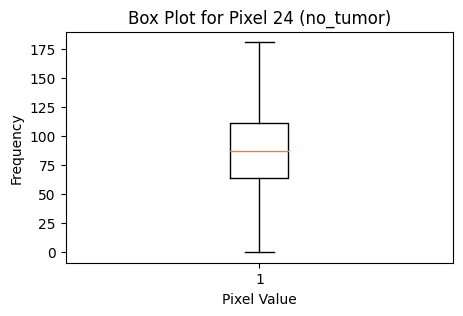

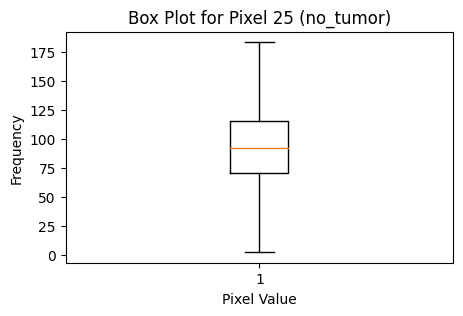

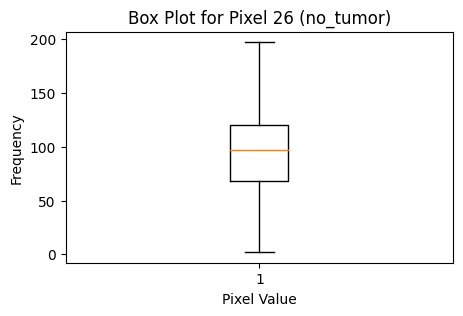

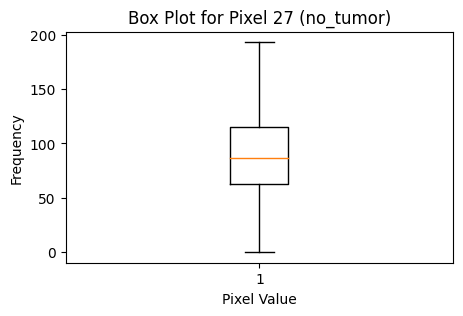

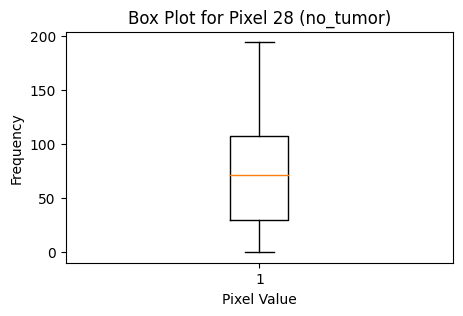

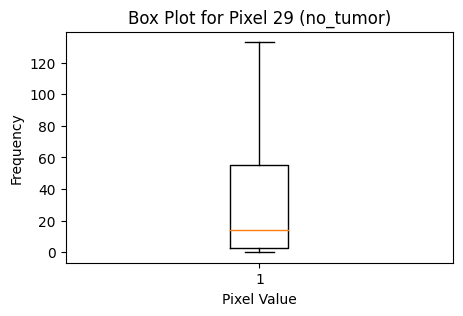

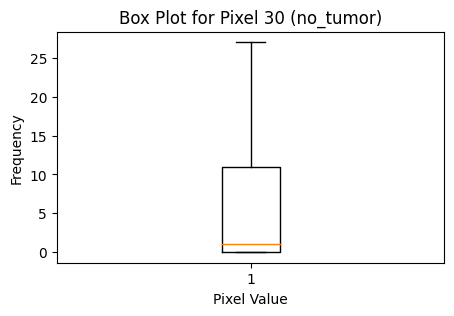

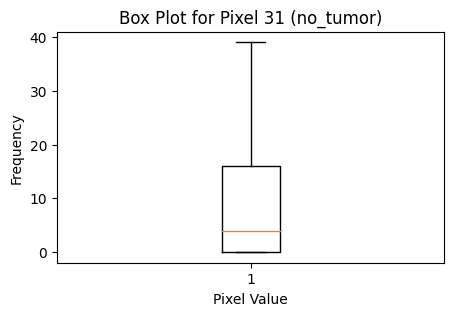

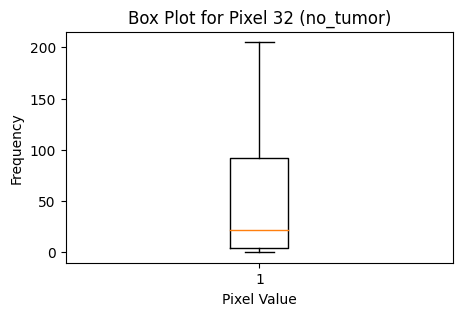

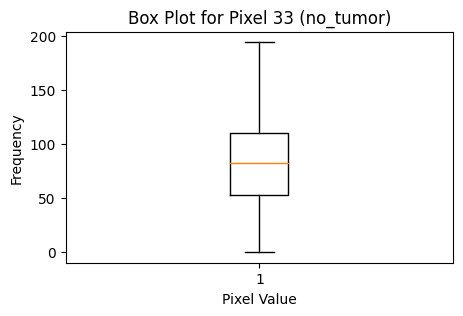

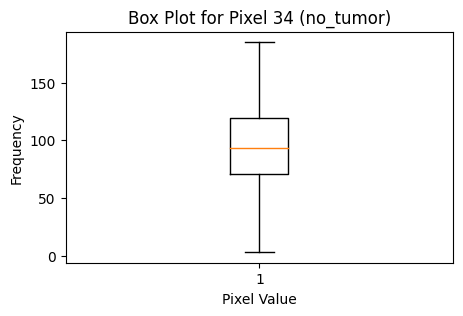

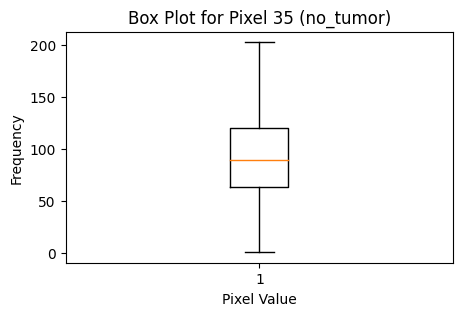

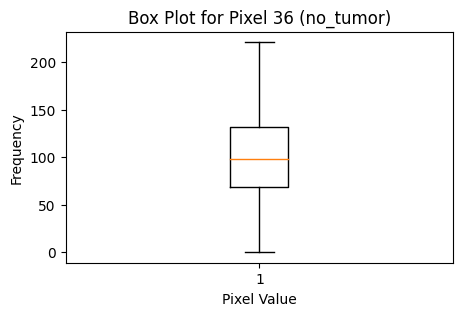

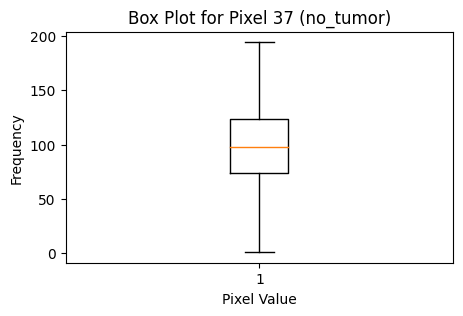

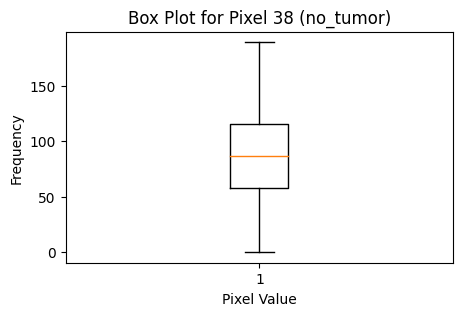

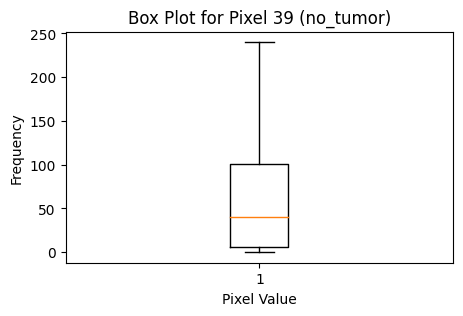

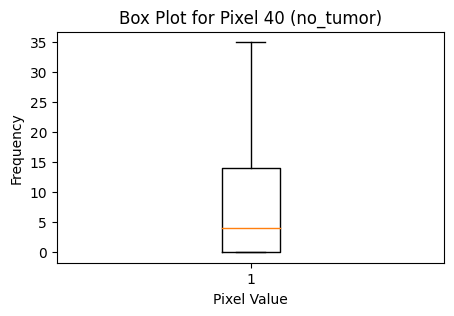

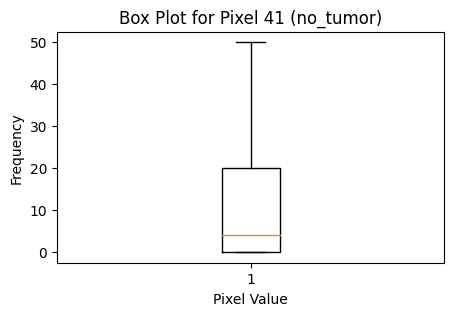

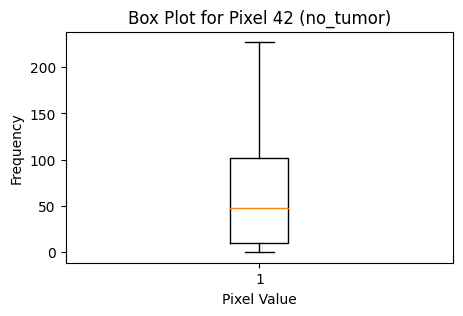

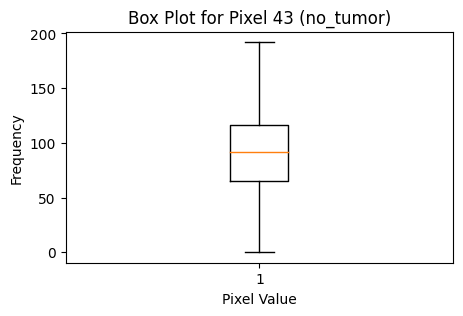

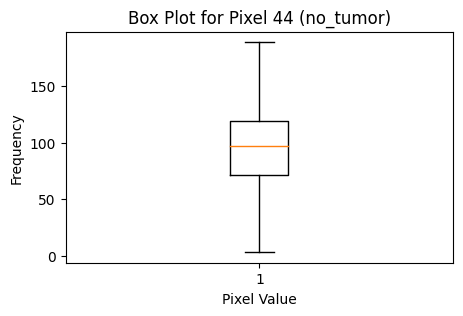

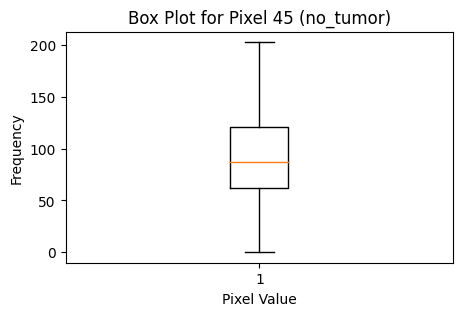

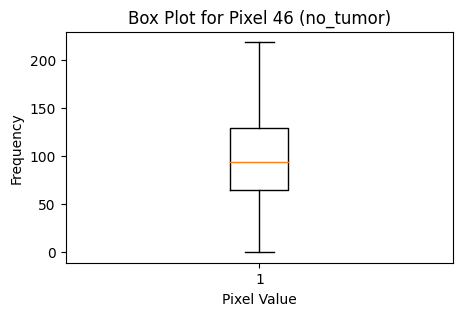

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

tumor = [('glioma_tumor', 0), ('meningioma_tumor', 1), ('no_tumor', 2), ('pituitary_tumor', 3)]
path1 = '/content/Brain-Tumor-Classification-DataSet/Training/'

def get_array_per_class(path, tumor_type, target_size=(10, 10)):
    X = []

    for typ, val in tumor:
        if typ == tumor_type:
            for image in os.listdir(os.path.join(path, typ)):
                img = cv2.resize(cv2.imread(os.path.join(path, typ, image), cv2.IMREAD_GRAYSCALE), target_size)
                X.append(img.flatten())
    return X

# Plot box plots for each tumor class
for tumor_type, _ in tumor:
    image_array_per_class = np.array(get_array_per_class(path1, tumor_type))

    # Get the number of pixels
    num_pixels = image_array_per_class.shape[1]

    # Plot each pixel's box plot in a separate figure
    for pixel_index in range(num_pixels):
        plt.figure(figsize=(5, 3))
        plt.boxplot(image_array_per_class[:, pixel_index], showfliers=False)
        plt.title(f'Box Plot for Pixel {pixel_index+1} ({tumor_type})')
        plt.xlabel('Pixel Value')
        plt.ylabel('Frequency')
        plt.show()


In [ ]:
def display (img_array) :

    dim = 10

    plt.figure(figsize  = (dim , dim))
    for i, img in enumerate(img_array) :
        plt.subplot(2, 2, i+1)
        plt.imshow(img,'gray')
        plt.title(img.shape)

    plt.show()

In [ ]:
def get_array (path) :

    X = []
    y = []

    for typ, val in tumor :
        for image in os.listdir(os.path.join(path, typ)) :
            img = cv2.resize(cv2.imread(path+typ+'/'+image, cv2.IMREAD_GRAYSCALE), (200,200))

            # create arrays
            X.append(img_to_array( Image.fromarray(img)))
            y.append(val)
    return X, y

In [ ]:
image_array = []
for i, image_path in enumerate(Path) :
    image_array.append(cv2.resize(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), (200,200)))

In [ ]:
display(image_array)


In [ ]:
X_train, y_train = get_array(path1)

In [ ]:
X_test , y_test  = get_array(path2)

In [ ]:
X_train, X_test = np.array(X_train), np.array(X_test)
y_train, y_test = np.array(y_train), np.array(y_test)

In [ ]:
X_train = np.array(X_train)
X_train/= 255.0

In [ ]:
y_train = np.array(keras.utils.to_categorical(y_train))

In [ ]:
X_test = np.array(X_test)
X_test/= 255.0

In [ ]:
y_test = np.array(keras.utils.to_categorical(y_test))

In [ ]:
print(X_train.shape)
print(y_train.shape)

In [ ]:
print(X_test.shape)
print(y_test.shape)

In [ ]:
info = {0 : 'Glioma tumor', 1 : 'Meningioma tumor', 2 : 'No tumor', 3 : 'Pituitary tumor'}

In [ ]:
plt.figure(figsize = (12,12))
for i in range(16) :
    plt.subplot(4, 4, i+1)
    x = np.random.randint(0, 2870)
    plt.imshow(X_train[x], 'gray')
    plt.title(info[np.argmax(y_train[x])])
    plt.axis('off')
plt.show()

In [ ]:
plt.hist(np.argmax(y_train, axis = 1))
plt.show()

In [ ]:
print(X_train.shape)
print(y_train.shape)

In [ ]:
X_train = np.reshape(X_train, (2870, 200*200*1))
print(X_train.shape)
print(y_train.shape)

In [ ]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE(sampling_strategy = 'auto', random_state = 1, k_neighbors = 5).fit_resample(X_train, y_train)

In [ ]:
print(X_train.shape)
print(y_train.shape)

In [ ]:
X_train = np.reshape(X_train, (3308, 200, 200, 1))
print(X_train.shape)
print(y_train.shape)

In [ ]:
plt.figure(figsize = (12,12))
for i in range(16) :
    plt.subplot(4, 4, i+1)
    x = np.random.randint(2870, 3308)
    plt.imshow(X_train[x], 'gray')
    plt.title(info[np.argmax(y_train[x])])
    plt.axis('off')
plt.show()

In [ ]:
plt.hist(np.argmax(y_train, axis = 1))
plt.show()

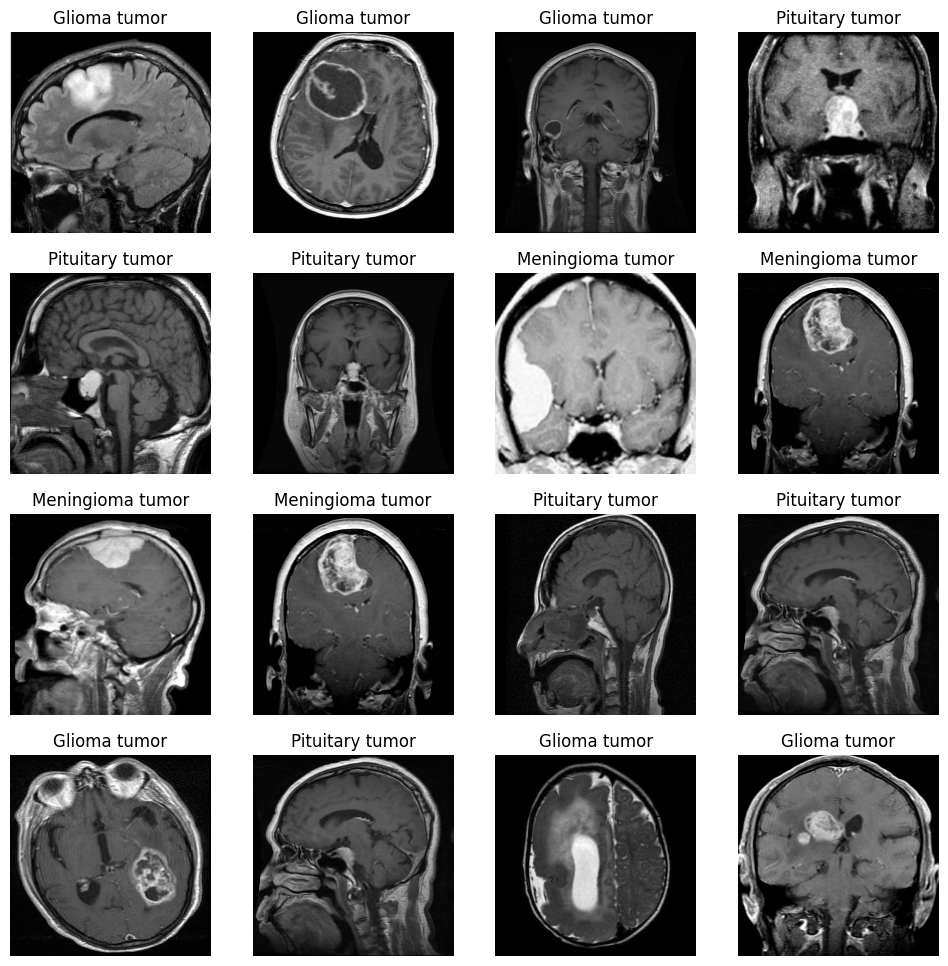

In [ ]:
plt.figure(figsize = (12,12))
for i in range(16) :
    plt.subplot(4, 4, i+1)
    x = np.random.randint(0,390)
    plt.imshow(X_test[x],'gray')
    plt.title(info[np.argmax(y_test[x])])
    plt.axis('off')
plt.show()

In [ ]:
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Conv2D

In [ ]:
def conv_layer (filterx) :

    model = Sequential()
    model.add(Conv2D(filterx, (3,3), padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'valid'))
    model.add(BatchNormalization())

    return model

In [ ]:
def dens_layer (hiddenx) :

    model = Sequential()
    model.add(Dense(hiddenx, activation = 'relu', kernel_regularizer = 'l2'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    return model

In [ ]:
def cnn (filter1, filter2, filter3, hidden1, hidden2) :

    model = Sequential()

    model.add(Input((200,200,1,)))
    model.add(conv_layer(filter1))
    model.add(conv_layer(filter2))
    model.add(conv_layer(filter3))

    model.add(Flatten())
    model.add(dens_layer(hidden1))
    model.add(dens_layer(hidden2))
    model.add(Dense(4, activation = 'softmax'))

    model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['accuracy'])

    return model

In [ ]:
print(X_train.shape)
print(y_train.shape)

(3308, 200, 200, 1)
(3308, 4)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(zoom_range = [0.85, 1.0], rotation_range = 3)

In [ ]:
gen.fit(X_train)
train_gen = gen.flow(X_train, y_train, batch_size = 32)

In [ ]:
print(X_train.shape)

(3308, 200, 200, 1)


In [ ]:
trainX, trainy = train_gen.next()

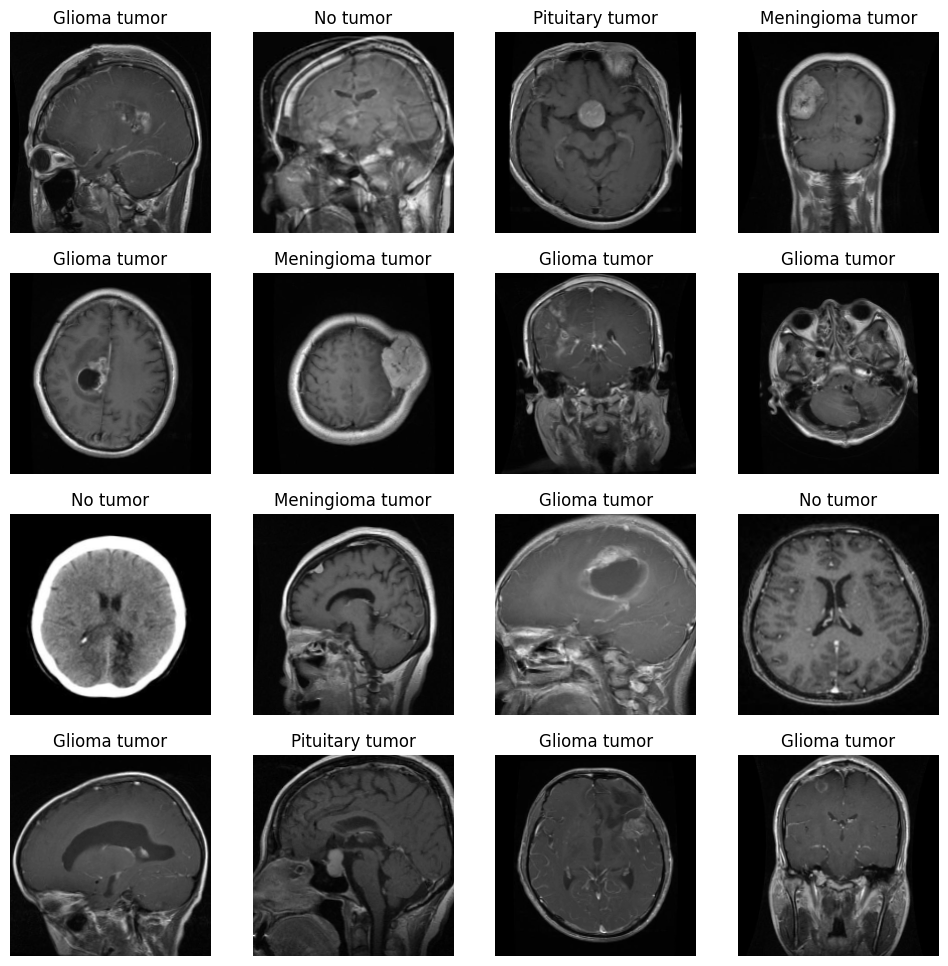

In [ ]:
plt.figure(figsize = (12,12))
for i in range(16) :
    plt.subplot(4, 4, i+1)
    plt.imshow(trainX[i], 'gray')
    plt.title(info[np.argmax(trainy[i])])
    plt.axis('off')
plt.show()

In [ ]:
from keras.callbacks import ModelCheckpoint
checkp = ModelCheckpoint('./brain_model.h5', monitor = 'val_accuracy', save_best_only = True, verbose = 1)

In [ ]:
model = cnn(128, 64, 32, 128, 64)

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 100, 100, 128)     1792      
                                                                 
 sequential_2 (Sequential)   (None, 50, 50, 64)        74048     
                                                                 
 sequential_3 (Sequential)   (None, 25, 25, 32)        18592     
                                                                 
 flatten (Flatten)           (None, 20000)             0         
                                                                 
 sequential_4 (Sequential)   (None, 128)               2560640   
                                                                 
 sequential_5 (Sequential)   (None, 64)                8512      
                                                                 
 dense_2 (Dense)             (None, 4)                 2

In [ ]:
history = model.fit(gen.flow(X_train, y_train, batch_size = 64), epochs = 50, validation_data = (X_test,y_test), callbacks = [checkp])

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss', 'validation loss'])
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.title('Loss vs Epochs', fontsize = 15)

In [ ]:
plt.figure(figsize = (20,7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training accuracy', 'validation accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs', fontsize = 15)

In [ ]:
pred = model.predict(X_test)

In [ ]:
print(pred[0:3,:])

In [ ]:
temp = np.argmax(pred, axis = 1)
pred = np.zeros(pred.shape)

In [ ]:
pred[np.arange(pred.shape[0]), temp] = 1

In [ ]:
print(pred[0:3,:])
print(y_test[0:3,:])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print('Accuracy : ' + str(accuracy_score(y_test, pred)))
print(classification_report(y_test, pred, target_names = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']))